# Kaggle Meta-Challenge

The data collected with the Kaggle survey can be separated in two main categories: one about the personal data of the interviewed, and the other about their computational knowledege.
So to analyzed it, given that there are many parameters I will focus mainly in the link between the income and the other parameters given by the interviewed.
First, the needed packages are imported. Then uploaded data it's cleaned, but to create a dataframe named data with all the personal information.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from collections import Counter
from numpy import linalg as la
#from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
MCR = pd.read_csv('multipleChoiceResponses.csv')
#the answers of the participants
MCR_A = MCR.iloc[1:,:]
#the questions
MCR_Q = MCR.iloc[0,:]

/home/beatrizo/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#cleaning the answers (the answers written by the interviewed are not taken into account)
personal_data = MCR_A.iloc[:,1:13].copy()
personal_data.drop(['Q1_OTHER_TEXT','Q6_OTHER_TEXT','Q7_OTHER_TEXT'], axis=1, inplace=True)
personal_data = personal_data.drop(list(personal_data[personal_data.Q9 == 'I do not wish to disclose my approximate yearly compensation'].index), axis=0)
personal_data = personal_data[~personal_data.Q9.isnull()].copy()
personal_data.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"


Now, for these data, with previous visualizations of it,there was found that the main differences between the different relations of the incomes and the other personal data, like Level of Education, Age, Major or Industry where seen in the top 20% of all the incomes, that means that in the scale from 0 to 500.000 dollars, relevant differences are appreciable for those who recieve an income higher than 90.000 dollars a year. 

In [4]:
#It's created a column with an average of the possible intervals of incomes that were given to the interviewed 
salary = personal_data.Q9.str.replace(',', '').str.replace('500000\+', '500-500000').str.split('-')
personal_data['Q9_1'] = salary.apply(lambda x: (int(x[0])*1000 + int(x[1]))/2)
# Column with boolean values that says if the interviewed is in the top 20% of highest incomes.
personal_data['Q9_2'] = personal_data.Q9_1 > personal_data.Q9_1.quantile(0.8)

In [5]:
#series with all the personal data for those who recieve more than 90.000 dollars a year.
Top_salary=personal_data.loc[list(personal_data.Q9_2[personal_data.Q9_2==True].index)]

In [6]:
#with this function it's found the frequency for every possible answers of a specific question.
def freq_salary(x_salary):
    freq_x=np.array(x_salary.value_counts(dropna=False, sort=True))
    freq_x=freq_x[1:]
    freq_x=freq_x*100/np.amax(freq_x) 
    ind_x=np.arange(len(freq_x))
    return(freq_x,ind_x)

## Frequencies

### Gender and Income:

In the following plot it is possible to appreciate that for the highest incomes there are more men than women. It is important to make clear that the frequencies were normalized. There are no women who recieve more that 500.000 dollars a year.
Even if the frequencies are normalized it can't be affirmed just with this data (even it is well known) that men tend to have higher incomes than women, because there were more interviewed men than women.

/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


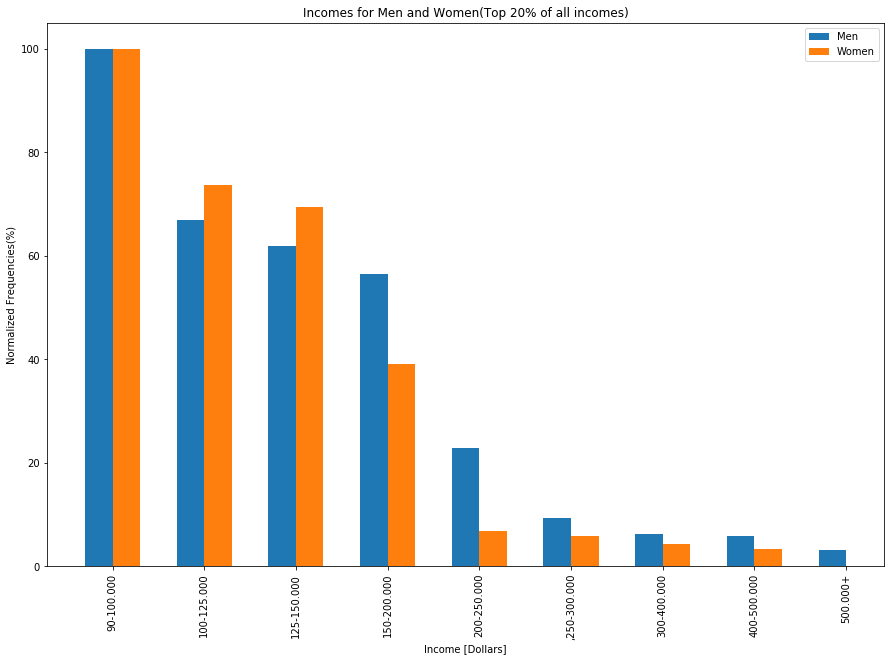

In [7]:
#Here are created series for men and women who have an income higher than 90.000 dollars a year. 
male_top_salary=Top_salary.loc[list(personal_data[personal_data.Q1== 'Male'].index)]
female_top_salary=Top_salary.loc[list(personal_data[personal_data.Q1== 'Female'].index)]
#The frequencies for the different intervals of incomes are calculated, both for men and women 
freq_male,ind_male=freq_salary(male_top_salary.Q9_1)
freq_female,ind_female=freq_salary(female_top_salary.Q9_1)
#a list of string the intervals of incomes higher than 90.000 dollars is created
L=('90-100.000','100-125.000','125-150.000','150-200.000','200-250.000',
   ',250-300.000','300-400.000','400-500.000','500.000+')
#the result are given in a bar plot.
plt.figure(figsize=(15,10))
w=0.3
plt.xticks(ind_male,L,rotation='vertical')
plt.bar(ind_male-w/2,freq_male,width=w,label='Men')
plt.bar(ind_female+w/2,freq_female,width=w,label='Women')
plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Incomes for Men and Women(Top 20% of all incomes)')
plt.legend()

### Major and Income:

The same thing can be done for the undergraduate majors(um), and a similir plot is found. The percentege of people, no matter what um, dicreases as the income increases. But the important thing to say here is that for some majors their frequency at the highest incomes is zero. 
For example there are no people with medical or life science, Information technology, fine arts or performing arts (probably Brad Pitt was not interviewed) and social sciences majors that have an income equal or higher than 500.000 dollars a year. Social Scientists do not even reach the 400-500.000 dollars interval.

In [8]:
L=('90-100.000','100-125.000','125-150.000','150-200.000','200-250.000',
   ',250-300.000','300-400.000','400-500.000','500.000+')
business_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'A business discipline (accounting, economics, finance, etc.)'].index)]
enviroment_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5 == 'Environmental science or geology '].index)]
physics_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Physics or astronomy'].index)]
engineering_not_data_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5 == 'Engineering (non-computer focused)'].index)]
math_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Mathematics or statistics'].index)]
medical_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Medical or life sciences (biology, chemistry, medicine, etc.)'].index)]
information_tech_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Information technology, networking, or system administration'].index)]
computar_science_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Computer science (software engineering, etc.)'].index)]
arts_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Fine arts or performing arts'].index)]
humanities_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Humanities (history, literature, philosophy, etc.)'].index)]
other_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Other'].index)]
not_declared_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'I never declared a major'].index)]
social_sciences_top_salary=Top_salary.loc[list(personal_data[personal_data.Q5== 'Social sciences (anthropology, psychology, sociology, etc.)'].index)]

freq_business,ind_business=freq_salary(business_top_salary.Q9_1)
freq_physics, ind_physics=freq_salary(physics_top_salary.Q9_1)
freq_engineering_not_data,ind_engineering_not_data=freq_salary(engineering_not_data_top_salary.Q9_1)
freq_math,ind_math=freq_salary(math_top_salary.Q9_1)
freq_medical,ind_medical=freq_salary(medical_top_salary.Q9_1)
freq_information,ind_information=freq_salary(information_tech_top_salary.Q9_1)
freq_computar_science,ind_computar_science=freq_salary(computar_science_top_salary.Q9_1)
freq_arts,ind_arts=freq_salary(arts_top_salary.Q9_1)
freq_other,ind_other=freq_salary(other_top_salary.Q9_1)
freq_not_declared,ind_not_declared=freq_salary(not_declared_top_salary.Q9_1)
freq_social_sciences,ind_social_sciences=freq_salary(social_sciences_top_salary.Q9_1)

/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

S

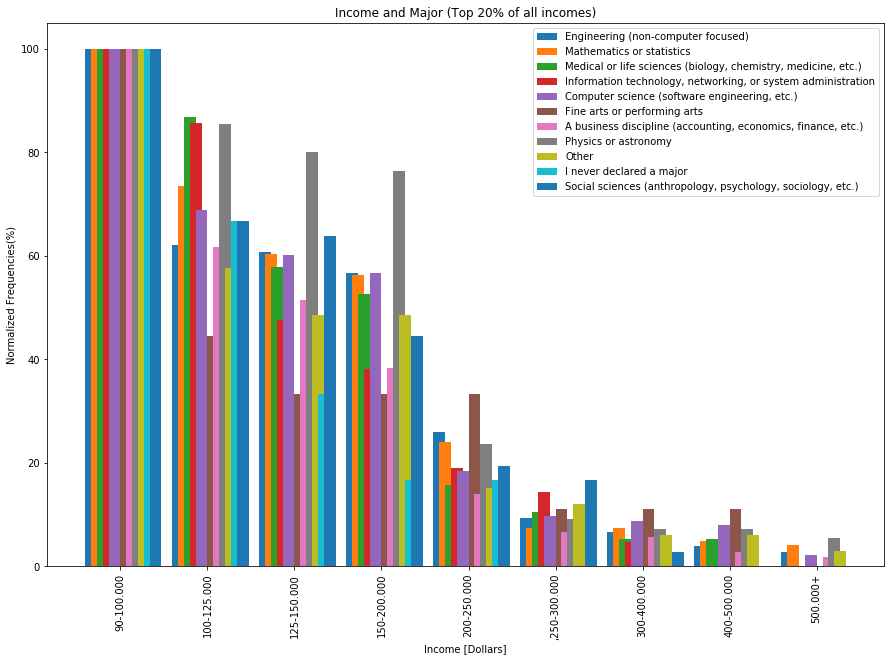

In [9]:
w=0.135
plt.figure(figsize=(15,10))
plt.xticks(ind_computar_science,L,rotation='vertical')
plt.bar(ind_engineering_not_data-w*5/2,freq_engineering_not_data,width=w,label='Engineering (non-computer focused)')
plt.bar(ind_math-w*4/2,freq_math,width=w,label='Mathematics or statistics')
plt.bar(ind_medical-w*3/2,freq_medical,width=w,label='Medical or life sciences (biology, chemistry, medicine, etc.)')
plt.bar(ind_information-w*2/2,freq_information,width=w,label='Information technology, networking, or system administration')
plt.bar(ind_computar_science-w*1/2,freq_computar_science,width=w,label='Computer science (software engineering, etc.)')
plt.bar(ind_arts+w*1/2,freq_arts,width=w,label='Fine arts or performing arts')
plt.bar(ind_business+w*2/2,freq_business,width=w,label='A business discipline (accounting, economics, finance, etc.)')
plt.bar(ind_physics+w*3/2,freq_physics,width=w,label='Physics or astronomy')
plt.bar(ind_other+w*4/2,freq_other,width=w,label='Other')
plt.bar(ind_not_declared+w*5/2,freq_not_declared,width=w,label='I never declared a major')
plt.bar(ind_social_sciences+w*6/2,freq_social_sciences,width=w,label='Social sciences (anthropology, psychology, sociology, etc.)')
plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Income and Major (Top 20% of all incomes)')
plt.legend()

### Age and Income:

Comparing incomes and age of the participants in the same kind of plot, it was found that people older than 69 years do not reach the 400.000 dollars a year, and with 80 years old or more do not earn more than 90.000 dollars a year.

In [10]:
L=('0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000','50-60,000', '60-70,000', '70-80,000','80-90,000',
   '90-100,000','100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000','300-400,000', '400-500,000',
   '500,000+')
a_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '18-21'].index)]
b_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '22-24'].index)]
c_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '25-29'].index)]
d_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '30-34'].index)]
e_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '35-39'].index)]
f_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '40-44'].index)]
g_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '45-49'].index)]
h_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '50-54'].index)]
i_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '55-59'].index)]
j_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '60-69'].index)]
k_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '70-79'].index)]
l_salary=personal_data.loc[list(personal_data[personal_data.Q2 == '80+'].index)]

freq_a,ind_a =freq_salary(a_salary.Q9_1)
freq_b,ind_b =freq_salary(b_salary.Q9_1)
freq_c,ind_c =freq_salary(c_salary.Q9_1)
freq_d,ind_d =freq_salary(d_salary.Q9_1)
freq_e,ind_e =freq_salary(e_salary.Q9_1)
freq_f,ind_f =freq_salary(f_salary.Q9_1)
freq_g,ind_g =freq_salary(g_salary.Q9_1)
freq_h,ind_h =freq_salary(h_salary.Q9_1)
freq_i,ind_i =freq_salary(i_salary.Q9_1)
freq_j,ind_j =freq_salary(j_salary.Q9_1)
freq_k,ind_k =freq_salary(k_salary.Q9_1)
freq_l,ind_l =freq_salary(l_salary.Q9_1)

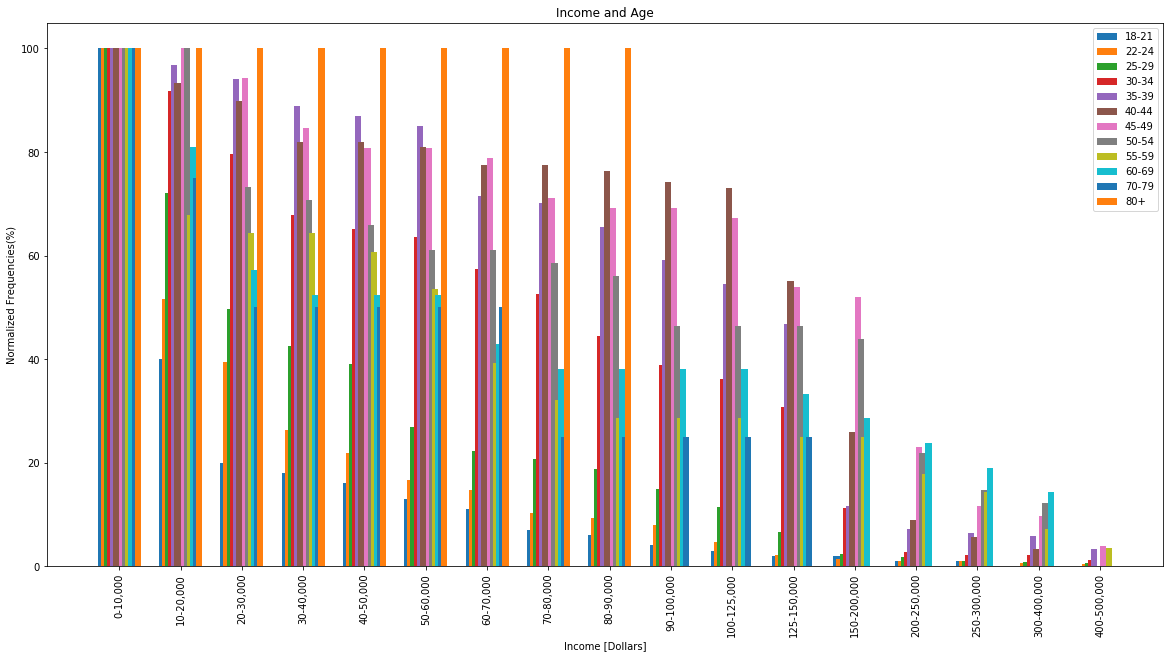

In [11]:
w=0.1
plt.figure(figsize=(20,10))
plt.xticks(ind_b,L,rotation='vertical')
plt.bar(ind_a-w*6/2,freq_a,width=w,label='18-21')
plt.bar(ind_b-w*5/2,freq_b,width=w,label='22-24')
plt.bar(ind_c-w*4/2,freq_c,width=w,label='25-29')
plt.bar(ind_d-w*3/2,freq_d,width=w,label='30-34')
plt.bar(ind_e-w*2/2,freq_e,width=w,label='35-39')
plt.bar(ind_f-w*1/2,freq_f,width=w,label='40-44')
plt.bar(ind_g+w*1/2,freq_g,width=w,label='45-49')
plt.bar(ind_h+w*2/2,freq_h,width=w,label='50-54')
plt.bar(ind_i+w*3/2,freq_i,width=w,label='55-59')
plt.bar(ind_j+w*4/2,freq_j,width=w,label='60-69')
plt.bar(ind_k+w*5/2,freq_k,width=w,label='70-79')
plt.bar(ind_l+w*6/2,freq_l,width=w,label='80+')

plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Income and Age')
plt.legend()

### Industry of current contract and Income

Again, the same thing was done but with the different industries in which the interviewed have their current contracts. It was found that any of those who work with the goverment or as public servers or in the shippping, transportation,online bussines, internet based sales, military, non profit,retails and manufacturing industries, have an income equal or higher than 500.000 dollars a year.
Those who work in the bussines and internet based sales or non profit industry do not reach the 300-400.000 dollars interval, and those who work in the shippping and transportation or the non profit industry do not reach the 250-300.000 dollars interval.
As there were many options for industries, there were given two plots, each one with half of the industries.

In [12]:
energy_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Energy/Mining'].index)]
goverment_salary=Top_salary.loc[list(personal_data[personal_data.Q7 == 'Government/Public Service'].index)]
shipping_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Shipping/Transportation'].index)]
other_salary=Top_salary.loc[list(personal_data[personal_data.Q7 == 'Other'].index)]
academics_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Academics/Education'].index)]
online_serv_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Online Service/Internet-based Services'].index)]
computers_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Computers/Technology'].index)]
sports_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Hospitality/Entertainment/Sports'].index)]
marketing_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Marketing/CRM'].index)]
insurance_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Insurance/Risk Assessment'].index)]
online_buss_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Online Business/Internet-based Sales'].index)]
broadcasting_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Broadcasting/Communications'].index)]
sales_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Retail/Sales'].index)]
accounting_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Accounting/Finance'].index)]
military_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Military/Security/Defense'].index)]
service_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Non-profit/Service'].index)]
student_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'I am a student'].index)]
fabrication_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Manufacturing/Fabrication'].index)]
medical_salary=Top_salary.loc[list(personal_data[personal_data.Q7== 'Medical/Pharmaceutical'].index)]

freq_energy,ind_energy =freq_salary(energy_salary.Q9_1)
freq_goverment,ind_goverment =freq_salary(goverment_salary.Q9_1)
freq_shipping,ind_shipping =freq_salary(shipping_salary.Q9_1)
freq_other,ind_other=freq_salary(other_salary.Q9_1)
freq_academics,ind_academics =freq_salary(academics_salary.Q9_1)
freq_online_serv,ind_online_serv =freq_salary(online_serv_salary.Q9_1)
freq_computers,ind_computers =freq_salary(computers_salary.Q9_1)
freq_sports,ind_sports=freq_salary(sports_salary.Q9_1)
freq_marketing,ind_marketing =freq_salary(marketing_salary.Q9_1)
freq_insurance,ind_insurance =freq_salary(insurance_salary.Q9_1)
freq_online_buss,ind_online_buss =freq_salary(online_buss_salary.Q9_1)
freq_broadcasting,ind_broadcasting =freq_salary(broadcasting_salary.Q9_1)
freq_sales,ind_sales =freq_salary(sales_salary.Q9_1)
freq_accounting,ind_accounting =freq_salary(accounting_salary.Q9_1)
freq_military,ind_military=freq_salary(military_salary.Q9_1)
freq_service,ind_service =freq_salary(service_salary.Q9_1)
freq_student,ind_student =freq_salary(student_salary.Q9_1)
freq_fabrication,ind_fabrication =freq_salary(fabrication_salary.Q9_1)
freq_medical,ind_medical =freq_salary(medical_salary.Q9_1)


/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://

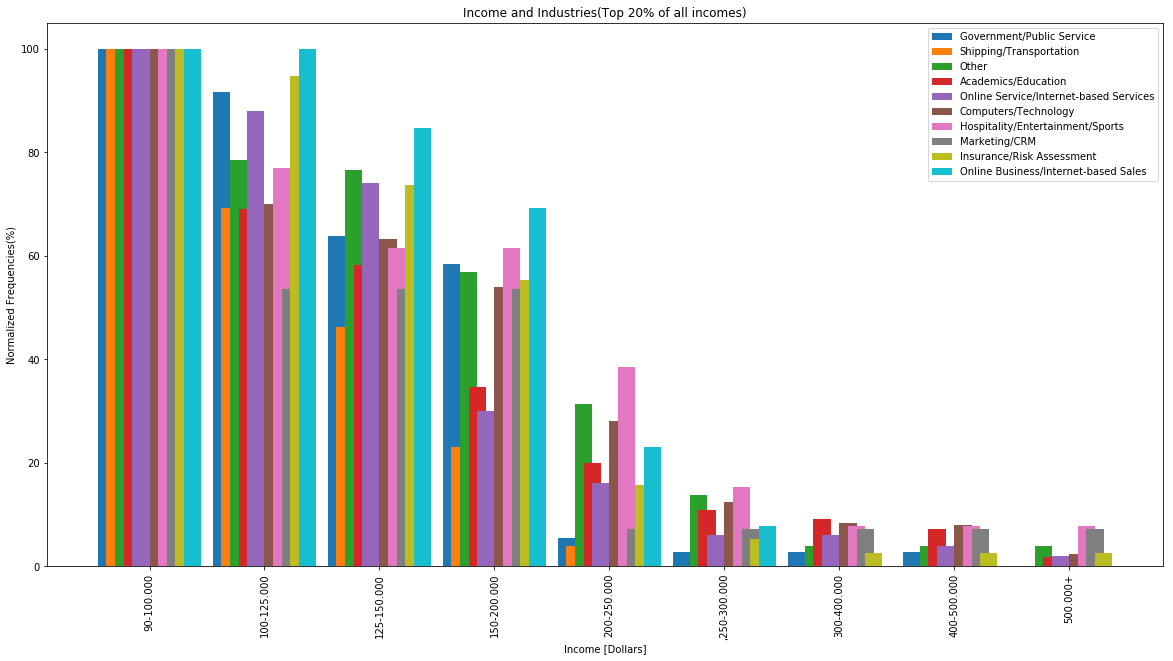

In [13]:
L=('90-100.000','100-125.000','125-150.000','150-200.000','200-250.000',
   ',250-300.000','300-400.000','400-500.000','500.000+')
w=0.15
plt.figure(figsize=(20,10))
plt.xticks(ind_computers,L,rotation='vertical')
plt.bar(ind_goverment-w*5/2,freq_goverment,width=w,label='Government/Public Service')
plt.bar(ind_shipping-w*4/2,freq_shipping,width=w,label='Shipping/Transportation')
plt.bar(ind_online_serv-w*3/2,freq_online_serv,width=w,label='Other')
plt.bar(ind_other-w*2/2,freq_other,width=w,label='Academics/Education')
plt.bar(ind_academics-w*1/2,freq_academics,width=w,label='Online Service/Internet-based Services')
plt.bar(ind_computers+w*1/2,freq_computers,width=w,label='Computers/Technology')
plt.bar(ind_sports+w*2/2,freq_sports,width=w,label='Hospitality/Entertainment/Sports')
plt.bar(ind_marketing+w*3/2,freq_marketing,width=w,label='Marketing/CRM')
plt.bar(ind_insurance+w*4/2,freq_insurance,width=w,label='Insurance/Risk Assessment')
plt.bar(ind_online_buss+w*5/2,freq_online_buss,width=w,label='Online Business/Internet-based Sales')
plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Income and Industries(Top 20% of all incomes)')
plt.legend()

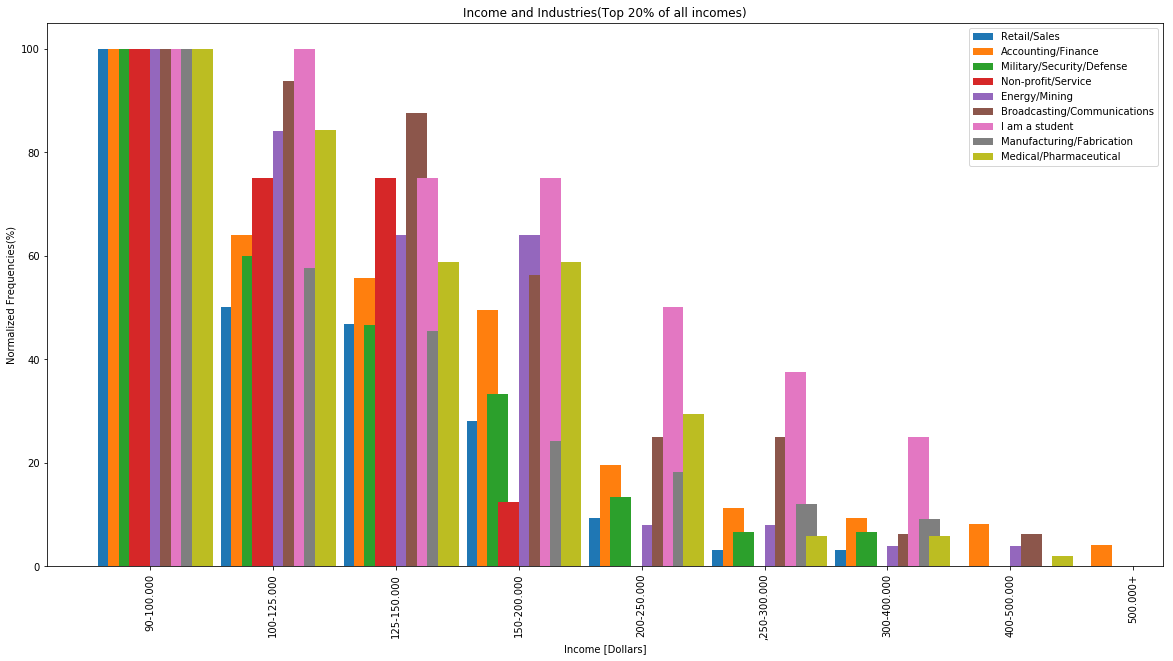

In [14]:
L=('90-100.000','100-125.000','125-150.000','150-200.000','200-250.000',
   ',250-300.000','300-400.000','400-500.000','500.000+')
w=0.17
plt.figure(figsize=(20,10))
plt.xticks(ind_b,L,rotation='vertical')
plt.bar(ind_sales-w*4/2,freq_sales,width=w,label='Retail/Sales')
plt.bar(ind_accounting-w*3/2,freq_accounting,width=w,label='Accounting/Finance')
plt.bar(ind_military-w*2/2,freq_military,width=w,label='Military/Security/Defense')
plt.bar(ind_service-w*1/2,freq_service,width=w,label='Non-profit/Service')
plt.bar(ind_energy+w*1/2,freq_energy,width=w,label='Energy/Mining')
plt.bar(ind_broadcasting+w*2/2,freq_broadcasting,width=w,label='Broadcasting/Communications')
plt.bar(ind_student+w*3/2,freq_student,width=w,label='I am a student')
plt.bar(ind_fabrication+w*4/2,freq_fabrication,width=w,label='Manufacturing/Fabrication')
plt.bar(ind_medical+w*5/2,freq_medical,width=w,label='Medical/Pharmaceutical')
plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Income and Industries(Top 20% of all incomes)')
plt.legend()

### Level of Education and Income:

In this case it was analyzed the level of education versus the income and it was found that those with a professional degree, those who have university studies without earning a bacherlor's degree and those who do not have a formal education past high school do not reach the 300.000 dollars a year.
And those who earn 500.000 dollars a year or more are those who have a Doctoral, a Master or a Bacherlor's degree.

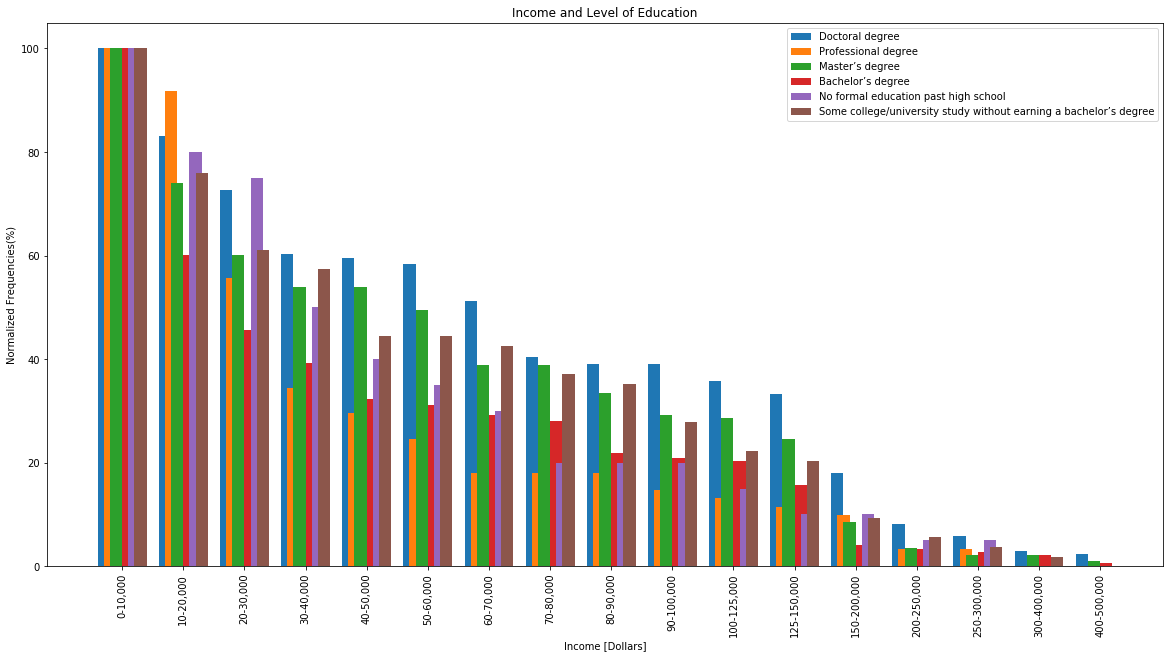

In [15]:
prof_salary=personal_data.loc[list(personal_data[personal_data.Q4== 'Professional degree'].index)]
mast_salary=personal_data.loc[list(personal_data[personal_data.Q4 == 'Master’s degree'].index)]
bach_salary=personal_data.loc[list(personal_data[personal_data.Q4== 'Bachelor’s degree'].index)]
nofor_salary=personal_data.loc[list(personal_data[personal_data.Q4 == 'No formal education past high school'].index)]
doc_salary=personal_data.loc[list(personal_data[personal_data.Q4== 'Doctoral degree'].index)]
somecol_salary=personal_data.loc[list(personal_data[personal_data.Q4== 'Some college/university study without earning a bachelor’s degree'].index)]

freq_prof,ind_prof =freq_salary(prof_salary.Q9_1)
freq_mast,ind_mast =freq_salary(mast_salary.Q9_1)
freq_bach,ind_bach =freq_salary(bach_salary.Q9_1)
freq_nofor,ind_nofor=freq_salary(nofor_salary.Q9_1)
freq_doc,ind_doc =freq_salary(doc_salary.Q9_1)
freq_somecol,ind_somecol =freq_salary(somecol_salary.Q9_1)

L=('0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000','50-60,000', '60-70,000', '70-80,000','80-90,000',
   '90-100,000','100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000','300-400,000', '400-500,000',
   '500,000+')
w=0.2
plt.figure(figsize=(20,10))
plt.xticks(ind_b,L,rotation='vertical')

plt.bar(ind_doc-w*3/2,freq_doc,width=w,label='Doctoral degree')
plt.bar(ind_prof-w*2/2,freq_prof,width=w,label='Professional degree')
plt.bar(ind_mast-w*1/2,freq_mast,width=w,label='Master’s degree')
plt.bar(ind_bach+w*1/2,freq_bach,width=w,label='Bachelor’s degree')
plt.bar(ind_nofor+w*2/2,freq_nofor,width=w,label='No formal education past high school')
plt.bar(ind_somecol+w*3/2,freq_somecol,width=w,label='Some college/university study without earning a bachelor’s degree')


plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Income and Level of Education')
plt.legend()

### Years of Experience and Income:

Other personal data collected with the survey was the years of experience in their current jobs. The years of experience were compared with the incomes and as it can be appreciated in the plot, those who have less than 1 year of experience do not reach the 500.000 dollars a year and that those with less than 3 years of experience rarely earn more than 200.000 dollars a year. 

In [16]:
L=('90-100,000','100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000','300-400,000', '400-500,000',
   '500,000+')
a_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '15-20'].index)]
b_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '0-1'].index)]
c_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '5-10'].index)]
d_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '10-15'].index)]
e_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '30 +'].index)]
f_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '2-3'].index)]
g_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '20-25'].index)]
h_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '3-4'].index)]
i_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '1-2'].index)]
j_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '4-5'].index)]
k_salary=Top_salary.loc[list(personal_data[personal_data.Q8 == '25-30'].index)]

freq_a,ind_a =freq_salary(a_salary.Q9_1)
freq_b,ind_b =freq_salary(b_salary.Q9_1)
freq_c,ind_c =freq_salary(c_salary.Q9_1)
freq_d,ind_d =freq_salary(d_salary.Q9_1)
freq_e,ind_e =freq_salary(e_salary.Q9_1)
freq_f,ind_f =freq_salary(f_salary.Q9_1)
freq_g,ind_g =freq_salary(g_salary.Q9_1)
freq_h,ind_h =freq_salary(h_salary.Q9_1)
freq_i,ind_i =freq_salary(i_salary.Q9_1)
freq_j,ind_j =freq_salary(j_salary.Q9_1)
freq_k,ind_k =freq_salary(k_salary.Q9_1)

/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can us

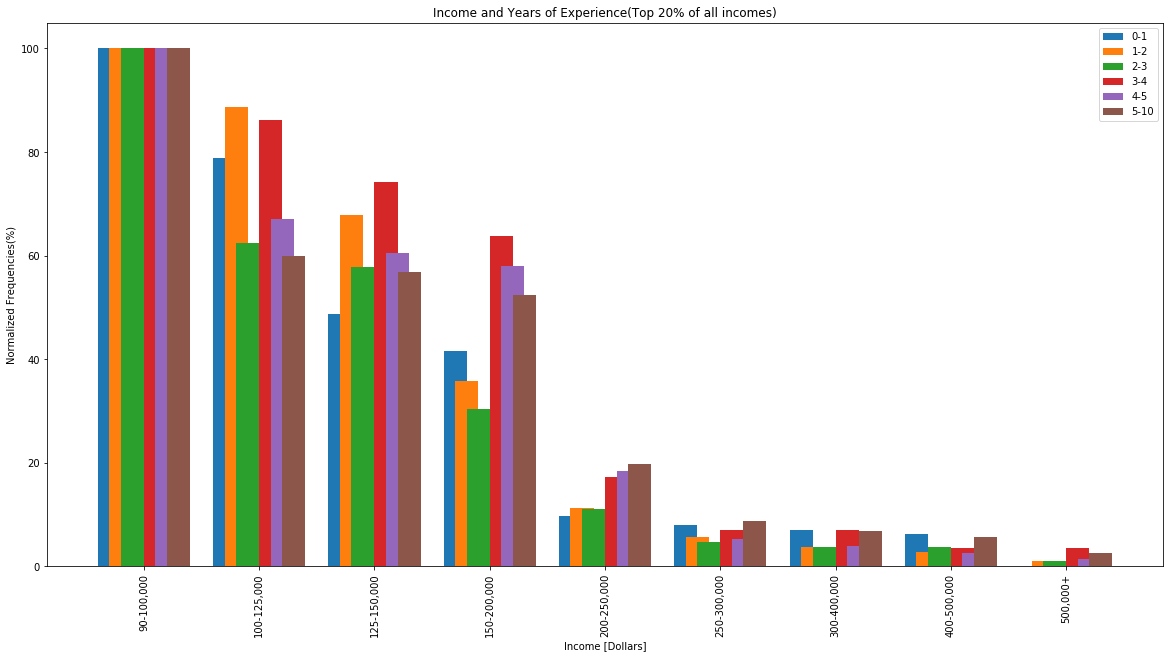

In [17]:
w=0.2
plt.figure(figsize=(20,10))
plt.xticks(ind_e,L,rotation='vertical')

plt.bar(ind_b-w*3/2,freq_b,width=w,label='0-1')
plt.bar(ind_i-w*2/2,freq_i,width=w,label='1-2')
plt.bar(ind_f-w*1/2,freq_f,width=w,label='2-3')
plt.bar(ind_h+w*1/2,freq_h,width=w,label='3-4')
plt.bar(ind_j+w*2/2,freq_j,width=w,label='4-5')
plt.bar(ind_c+w*3/2,freq_c,width=w,label='5-10')


plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Income and Years of Experience(Top 20% of all incomes)')
plt.legend()

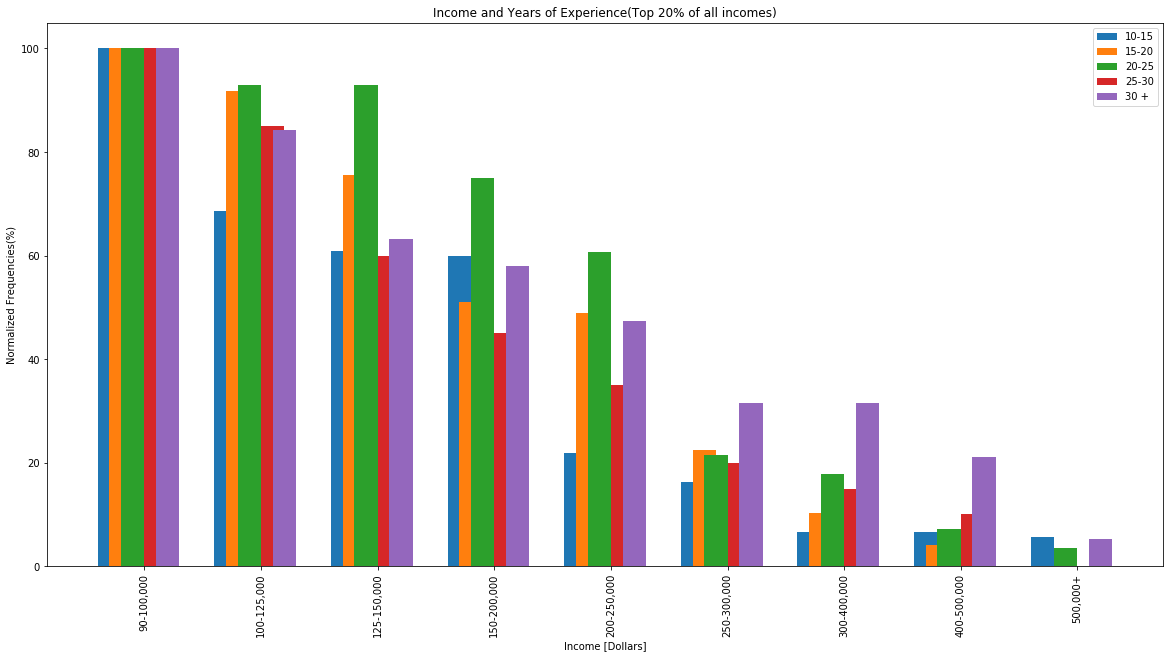

In [18]:
w=0.2
plt.figure(figsize=(20,10))
plt.xticks(ind_e,L,rotation='vertical')
plt.bar(ind_d-w*3/2,freq_d,width=w,label='10-15')
plt.bar(ind_a-w*2/2,freq_a,width=w,label='15-20')
plt.bar(ind_g-w*1/2,freq_g,width=w,label='20-25')
plt.bar(ind_k+w*1/2,freq_k,width=w,label='25-30')
plt.bar(ind_e+w*2/2,freq_e,width=w,label='30 +')
plt.xlabel('Income [Dollars]')
plt.ylabel('Normalized Frequencies(%)')
plt.title('Income and Years of Experience(Top 20% of all incomes)')
plt.legend()

### Doing some clustering with the personal data 

To find links between gender, age, education level, major, role, years of experience and income, all at the same time the the PCA(principal component analysis) and Kmeans methods were used over the clustering of the data.
For this, it was necessary to change the possible answers to dummie variables because the packages of sklearn for PCA and Kmeans online work with numbers, but giving a certain number in a hierarchy would have given wrong values to every different answer.

In [19]:
#Assigning dummies for the different answers of the personal data
dummiesQ1 = pd.get_dummies(personal_data['Q1'], prefix='Q1')
dummiesQ2 = pd.get_dummies(personal_data['Q2'], prefix='Q2')
dummiesQ4 = pd.get_dummies(personal_data['Q4'], prefix='Q4')
dummiesQ5 = pd.get_dummies(personal_data['Q5'], prefix='Q5')
dummiesQ6 = pd.get_dummies(personal_data['Q6'], prefix='Q6')
dummiesQ8 = pd.get_dummies(personal_data['Q8'], prefix='Q8')
dummiesQ9 = pd.get_dummies(personal_data['Q9'], prefix='Q9')
#All the dummies together
data = pd.concat([dummiesQ1,dummiesQ2,dummiesQ4,dummiesQ5,dummiesQ8,dummiesQ9], axis=1)
#All the possible answers for all the personal data questions
x_features = data.columns[:]

The following algorithm was implemented by Natalia Cardona, who is in the same class as me, for plotting the principal components. First, the covariance matrix was calculated, then the eigenvectors of the matrix, then projection of these vectors and finally the new coordinates of the data.

In [20]:
#Function to calculate projection of vectors
def proy(a,b):
    return np.dot(a,b)/np.sqrt(np.dot(a,a))

In [21]:
cov_matrix = np.array(data[x_features].cov())
val, vec = la.eig(cov_matrix)
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]
vec1 = vec[:,0]
vec2 = -vec[:,1]

In [22]:
#New coordinates of the data
new_c = []
labels = []
for index, rows in data.iterrows():
    fila = rows[x_features].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])

Text(0, 0.5, 'Second Principal Component')

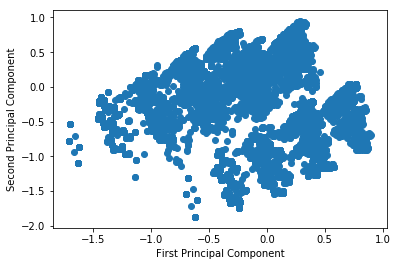

In [23]:
new_c=np.array(new_c)
plt.scatter(new_c[:,0],new_c[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


From the plot is easy to deduce that 11 is a good number of clusters, so Kmeans is implemented for 11 clusters and the following is found.

In [24]:
#Kmeans for 11 clusters
cluster11 = KMeans(n_clusters=11, random_state=10)
cluster_labels = cluster11.fit_predict(data[x_features])
data['clusters'] = cluster_labels

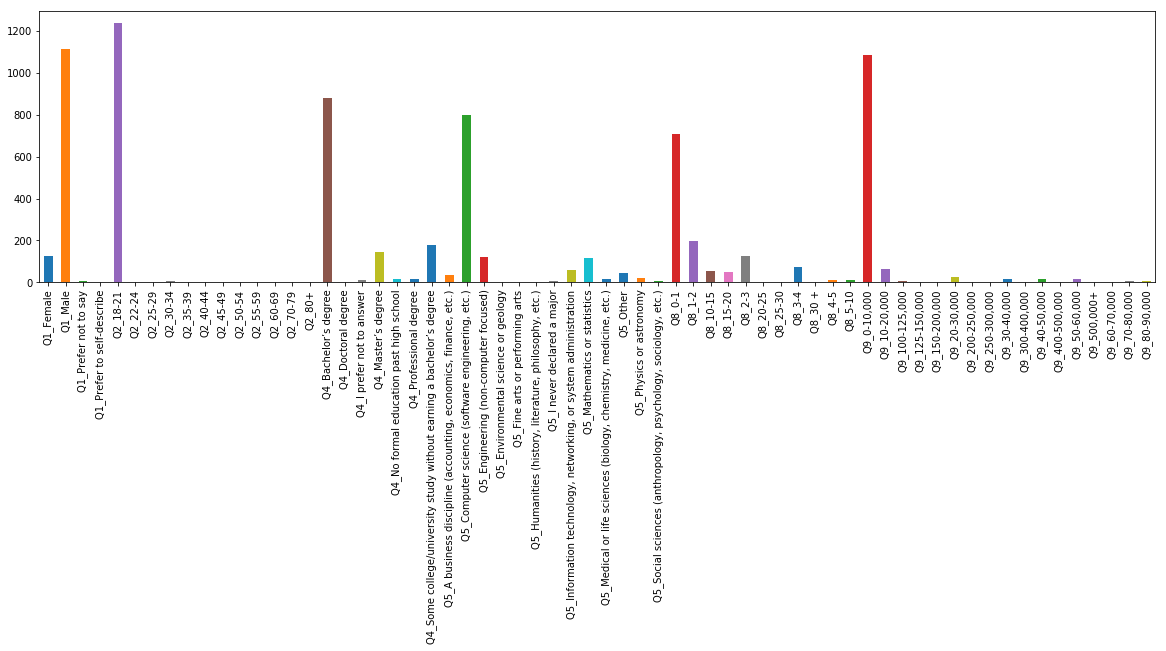

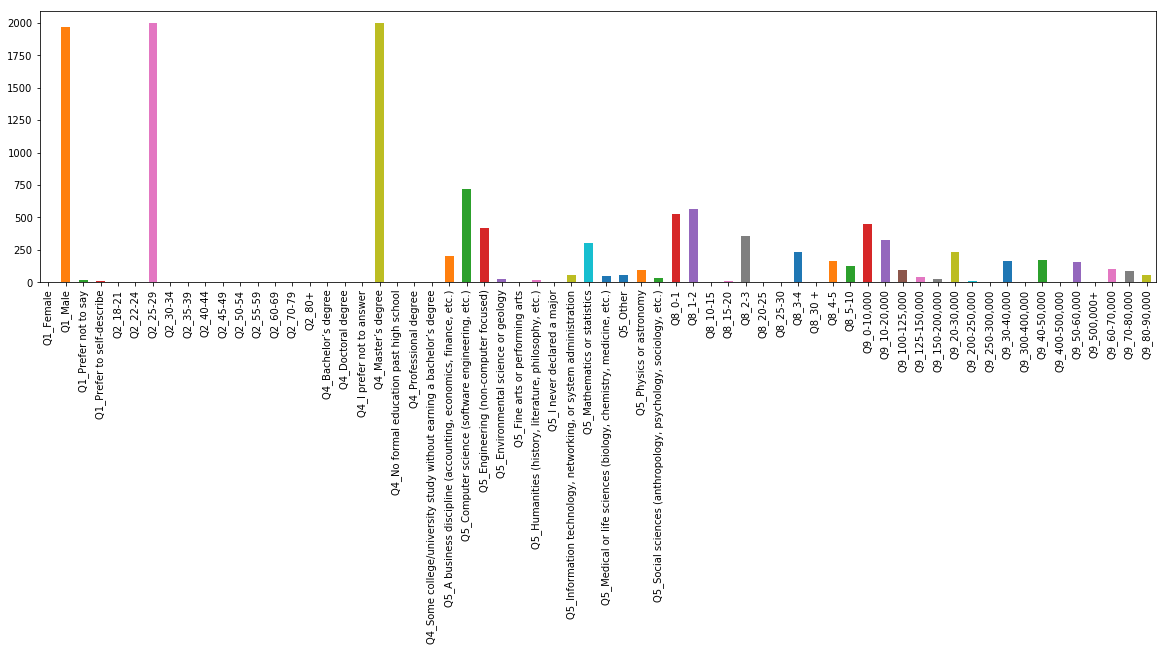

In [25]:
data[data.clusters==8].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data[data.clusters==6].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))

Given the 11 clusters there can be shown 11 of these plots, which show the frequency of every answer in each cluster. From these two examples, cluster 8 and 6 it is understood that men with ages between 18 and 21 have bachelor's degree, and men with ages between 25 and 29 have master's degree.

Now, doing a scanning for different numbers of clusters, with the help of silhouette score an optimal number of clusters was found. In this case the scanning was from 2 to 100, but the best one was 97, so, to make the processing time shorter, it is shown the scanning from 90 to 100 clusters.

In [26]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
range_n_clusters = np.arange(94,99)
X = data[x_features]
score = []
for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 94 The average silhouette_score is : 0.10987448270239454
For n_clusters = 95 The average silhouette_score is : 0.11174653537205884
For n_clusters = 96 The average silhouette_score is : 0.11593512556977852
For n_clusters = 97 The average silhouette_score is : 0.11663043711305861
For n_clusters = 98 The average silhouette_score is : 0.11317286082512447


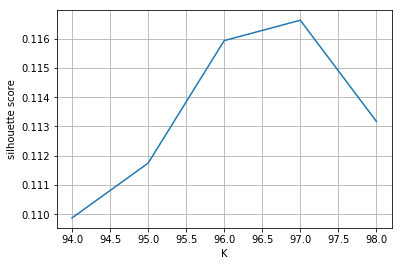

In [28]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.grid()

In [29]:
cluster97 = KMeans(n_clusters=97, random_state=10)
cluster_labels = cluster97.fit_predict(data[x_features])
data['clusters'] = cluster_labels

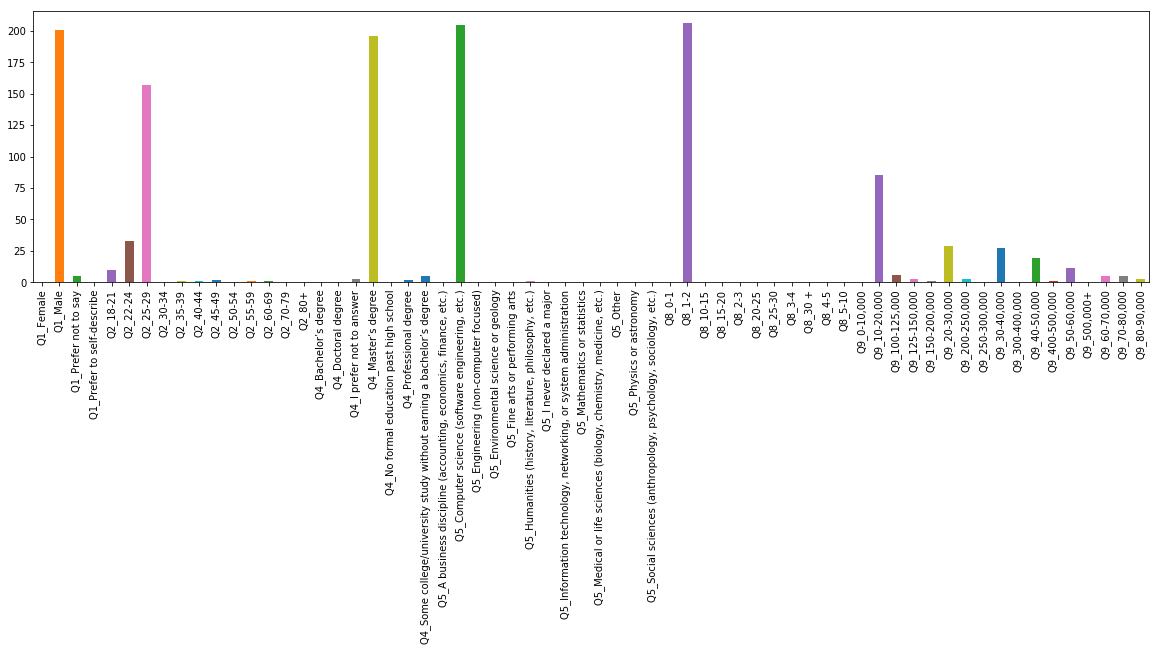

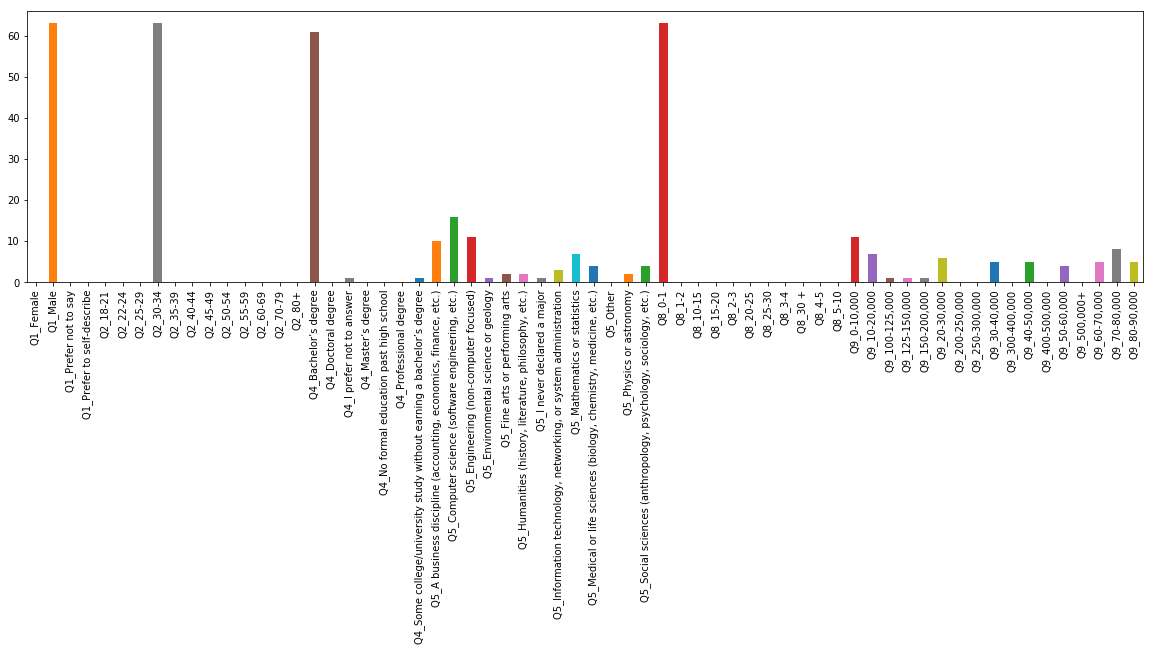

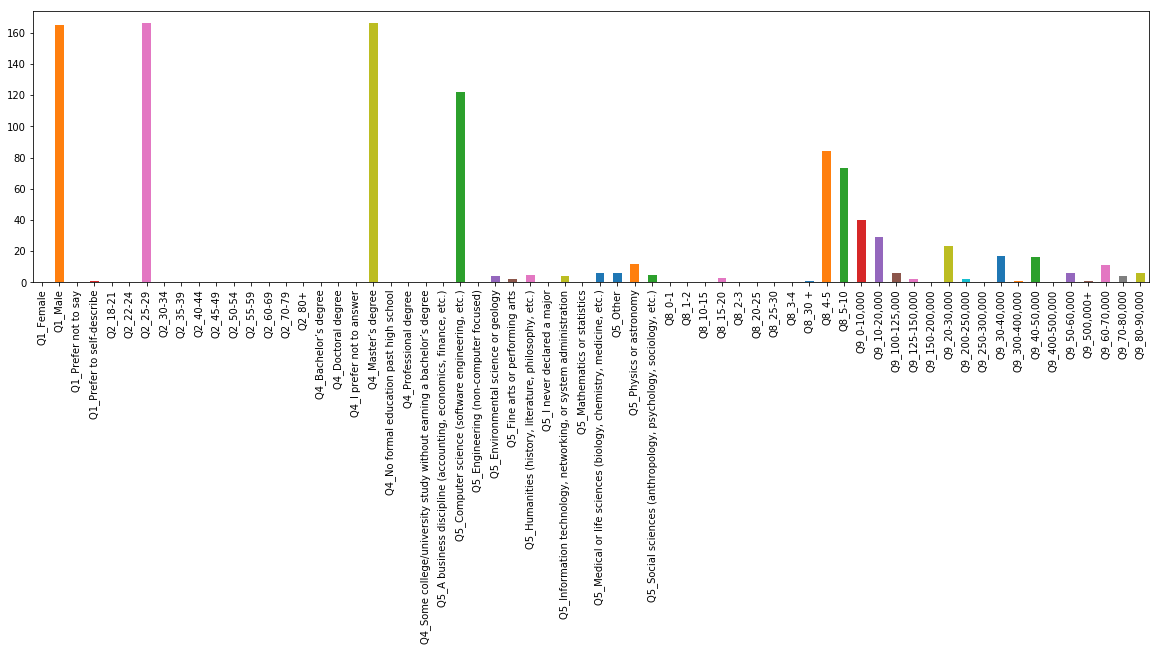

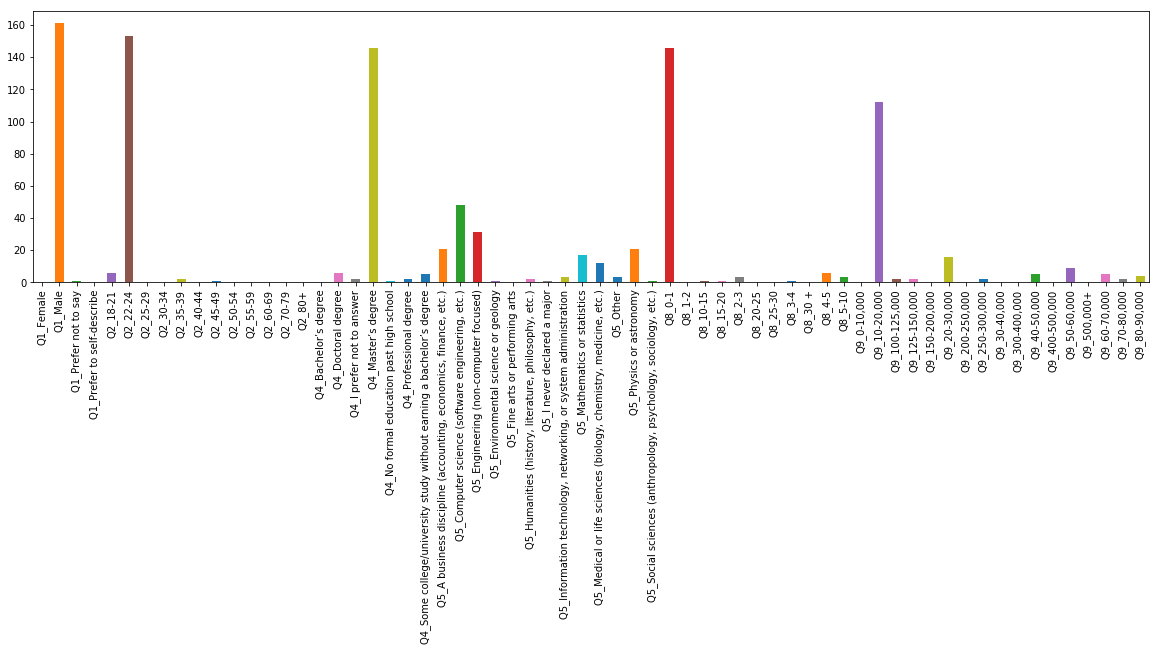

In [30]:
data[data.clusters==12].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data[data.clusters==33].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data[data.clusters==67].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data[data.clusters==88].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))

From these plots we can noticed tend to link to certain level of education and certain years of experience. If one looks closer to more clusters than just the ones that are shown here (12,33,67,88), one can seen that also, some majors and industries link to some incomes.

## Including the computational knowledge of the interviewed

To analyzed the questions that were not related to personal data, I chose some questions that seem relevant, but I did not include all of them to make it easier.
I grouped then in some subcategories(all the categories include answers to questions 5, 6 and 9 which were about major, role and income): the first subcategory included questions 10 which asked if their current employer was incorporating machine learning methods into their business, and 11, which asked for activities that make up an important part of their role at work. 

The second subcategory incuded questions 23, which asked for the percent of their time at work or school spent actively coding, question 24, which asked for the time that they have been writing code to analyze data, question 25, which asked for the time that they have used machine learning methods (at work or in school), and question 26, which asked if they considered themselves as data scientists. 

The third subcategory included questions 36, which asked for online platforms in which they have begun or completed data science courses, and question 37, which asked for the online platform in which they have you spent the most amount of time. 

And finally the last subcategory included questions 44, which asked for what they find most difficult about ensuring that their algorithms are fair and unbiased, question 45, which asked for the circumstances in which they would explore model insights and interpret their model's predictions, and 47, which asked for methods they prefer for explaining and/or interpreting decisions that are made by ML models.

In [32]:
Q5=MCR_A.iloc[:,6].copy()
Q6=MCR_A.iloc[:,7].copy()
Q9=MCR_A.iloc[:,12].copy()
Q9_1=personal_data.iloc[:,9].copy()
Q9_2=personal_data.iloc[:,10].copy()
#Selecting the answers for the computational knowledge questions
Q10=MCR_A.iloc[:,13].copy()
Q23=MCR_A.iloc[:,126].copy()
Q24=MCR_A.iloc[:,127].copy()
Q25=MCR_A.iloc[:,128].copy()
Q26=MCR_A.iloc[:,129].copy()
Q32=MCR_A.iloc[:,263].copy()
Q37=MCR_A.iloc[:,305].copy()
Q11=MCR_A.iloc[:,14:21].copy()
Q36=MCR_A.iloc[:,291:304].copy()
Q38=MCR_A.iloc[:,307:329].copy()
Q44=MCR_A.iloc[:,343:349].copy()
Q45=MCR_A.iloc[:,349:355].copy()
Q47=MCR_A.iloc[:,356:372].copy()

In [34]:
#Here a create dummies for all the possible answers for each of the questions a named before
dummiesQ5 = pd.get_dummies(MCR_A['Q5'], prefix='Q5')
dummiesQ6 = pd.get_dummies(MCR_A['Q6'], prefix='Q6')
dummiesQ9 = pd.get_dummies(MCR_A['Q9'], prefix='Q9')
dummiesQ9_1 = pd.get_dummies(personal_data['Q9_1'], prefix='Q9_1')
dummiesQ9_2 = pd.get_dummies(personal_data['Q9_2'], prefix='Q9_2')
dummiesQ10 = pd.get_dummies(MCR_A['Q10'], prefix='Q10')
dummiesQ23 = pd.get_dummies(MCR_A['Q23'], prefix='Q23')
dummiesQ24 = pd.get_dummies(MCR_A['Q24'], prefix='Q24')
dummiesQ25 = pd.get_dummies(MCR_A['Q25'], prefix='Q25')
dummiesQ26 = pd.get_dummies(MCR_A['Q26'], prefix='Q26')
dummiesQ32 = pd.get_dummies(MCR_A['Q32'], prefix='Q32')
dummiesQ37 = pd.get_dummies(MCR_A['Q37'], prefix='Q37')
dummiesQ40 = pd.get_dummies(MCR_A['Q40'], prefix='Q40')
dummiesQ11_1 = pd.get_dummies(MCR_A['Q11_Part_1'], prefix='Q11')
dummiesQ11_2 = pd.get_dummies(MCR_A['Q11_Part_2'], prefix='Q11')
dummiesQ11_3 = pd.get_dummies(MCR_A['Q11_Part_3'], prefix='Q11')
dummiesQ11_4 = pd.get_dummies(MCR_A['Q11_Part_4'], prefix='Q11')
dummiesQ11_5 = pd.get_dummies(MCR_A['Q11_Part_5'], prefix='Q11')
dummiesQ11_6 = pd.get_dummies(MCR_A['Q11_Part_6'], prefix='Q11')
dummiesQ11_7 = pd.get_dummies(MCR_A['Q11_Part_7'], prefix='Q11')
dummiesQ36_1 = pd.get_dummies(MCR_A['Q36_Part_1'], prefix='Q36')
dummiesQ36_2 = pd.get_dummies(MCR_A['Q36_Part_2'], prefix='Q36')
dummiesQ36_3 = pd.get_dummies(MCR_A['Q36_Part_3'], prefix='Q36')
dummiesQ36_4 = pd.get_dummies(MCR_A['Q36_Part_4'], prefix='Q36')
dummiesQ36_5 = pd.get_dummies(MCR_A['Q36_Part_5'], prefix='Q36')
dummiesQ36_6 = pd.get_dummies(MCR_A['Q36_Part_6'], prefix='Q36')
dummiesQ36_7 = pd.get_dummies(MCR_A['Q36_Part_7'], prefix='Q36')
dummiesQ36_8 = pd.get_dummies(MCR_A['Q36_Part_8'], prefix='Q36')
dummiesQ36_9 = pd.get_dummies(MCR_A['Q36_Part_9'], prefix='Q36')
dummiesQ36_10 = pd.get_dummies(MCR_A['Q36_Part_10'], prefix='Q36')
dummiesQ36_11 = pd.get_dummies(MCR_A['Q36_Part_11'], prefix='Q36')
dummiesQ36_12 = pd.get_dummies(MCR_A['Q36_Part_12'], prefix='Q36')
dummiesQ36_13 = pd.get_dummies(MCR_A['Q36_Part_13'], prefix='Q36')
dummiesQ44_1 = pd.get_dummies(MCR_A['Q44_Part_1'], prefix='Q44')
dummiesQ44_2 = pd.get_dummies(MCR_A['Q44_Part_2'], prefix='Q44')
dummiesQ44_3 = pd.get_dummies(MCR_A['Q44_Part_3'], prefix='Q44')
dummiesQ44_4 = pd.get_dummies(MCR_A['Q44_Part_4'], prefix='Q44')
dummiesQ44_5 = pd.get_dummies(MCR_A['Q44_Part_5'], prefix='Q44')
dummiesQ44_6 = pd.get_dummies(MCR_A['Q44_Part_6'], prefix='Q44')
dummiesQ45_1 = pd.get_dummies(MCR_A['Q45_Part_1'], prefix='Q45')
dummiesQ45_2 = pd.get_dummies(MCR_A['Q45_Part_2'], prefix='Q45')
dummiesQ45_3 = pd.get_dummies(MCR_A['Q45_Part_3'], prefix='Q45')
dummiesQ45_4 = pd.get_dummies(MCR_A['Q45_Part_4'], prefix='Q45')
dummiesQ45_5 = pd.get_dummies(MCR_A['Q45_Part_5'], prefix='Q45')
dummiesQ45_6 = pd.get_dummies(MCR_A['Q45_Part_6'], prefix='Q45')
dummiesQ47_1 = pd.get_dummies(MCR_A['Q47_Part_1'], prefix='Q47')
dummiesQ47_2 = pd.get_dummies(MCR_A['Q47_Part_2'], prefix='Q47')
dummiesQ47_3 = pd.get_dummies(MCR_A['Q47_Part_3'], prefix='Q47')
dummiesQ47_4 = pd.get_dummies(MCR_A['Q47_Part_4'], prefix='Q47')
dummiesQ47_5 = pd.get_dummies(MCR_A['Q47_Part_5'], prefix='Q47')
dummiesQ47_6 = pd.get_dummies(MCR_A['Q47_Part_6'], prefix='Q47')
dummiesQ47_7 = pd.get_dummies(MCR_A['Q47_Part_7'], prefix='Q47')
dummiesQ47_8 = pd.get_dummies(MCR_A['Q47_Part_8'], prefix='Q47')
dummiesQ47_9 = pd.get_dummies(MCR_A['Q47_Part_9'], prefix='Q47')
dummiesQ47_10 = pd.get_dummies(MCR_A['Q47_Part_10'], prefix='Q47')
dummiesQ47_11 = pd.get_dummies(MCR_A['Q47_Part_11'], prefix='Q47')
dummiesQ47_12 = pd.get_dummies(MCR_A['Q47_Part_12'], prefix='Q47')
dummiesQ47_13 = pd.get_dummies(MCR_A['Q47_Part_13'], prefix='Q47')
dummiesQ47_14 = pd.get_dummies(MCR_A['Q47_Part_14'], prefix='Q47')
dummiesQ47_15 = pd.get_dummies(MCR_A['Q47_Part_15'], prefix='Q47')
dummiesQ47_16 = pd.get_dummies(MCR_A['Q47_Part_16'], prefix='Q47')
dummiesQ47=pd.concat([dummiesQ47_1,dummiesQ47_2,dummiesQ47_3,dummiesQ47_4,dummiesQ47_5,dummiesQ47_6,dummiesQ47_7,dummiesQ47_8,dummiesQ47_9,dummiesQ47_10,dummiesQ47_11,dummiesQ47_12,dummiesQ47_13], axis=1)
dummiesQ45=pd.concat([dummiesQ45_1,dummiesQ45_2,dummiesQ45_3,dummiesQ45_4,dummiesQ45_5,dummiesQ45_6], axis=1)
dummiesQ44=pd.concat([dummiesQ44_1,dummiesQ44_2,dummiesQ44_3,dummiesQ44_4,dummiesQ44_5,dummiesQ44_6], axis=1)
dummiesQ36=pd.concat([dummiesQ36_1,dummiesQ36_2,dummiesQ36_3,dummiesQ36_4,dummiesQ36_5,dummiesQ36_6,dummiesQ36_7,dummiesQ36_8,dummiesQ36_9,dummiesQ36_10,dummiesQ36_11,dummiesQ36_12,dummiesQ36_13], axis=1)
dummiesQ11=pd.concat([dummiesQ11_1,dummiesQ11_2,dummiesQ11_3,dummiesQ11_4,dummiesQ11_5,dummiesQ11_6,dummiesQ11_7], axis=1)

In [78]:
#Here I gruped the dummies in the subcategories
data1 = pd.concat([dummiesQ5,dummiesQ6,dummiesQ9_1,dummiesQ10,dummiesQ11], axis=1)
data2 = pd.concat([dummiesQ5,dummiesQ6,dummiesQ9_1,dummiesQ23,dummiesQ24,dummiesQ25,dummiesQ26], axis=1)
data3 = pd.concat([dummiesQ5,dummiesQ6,dummiesQ36,dummiesQ37], axis=1)
data4 = pd.concat([dummiesQ5,dummiesQ6,dummiesQ44,dummiesQ45,dummiesQ47], axis=1)
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()
data4 = data4.dropna()
x_features1 = data1.columns[:]
x_features2 = data2.columns[:]
x_features3 = data3.columns[:]
x_features4 = data4.columns[:]

## Subcategory 1: Machine Learning at the work place

So, for the first category I implemented the PCA and Kmeans methods and obtained the following:

Text(0, 0.5, 'Second Principal Component')

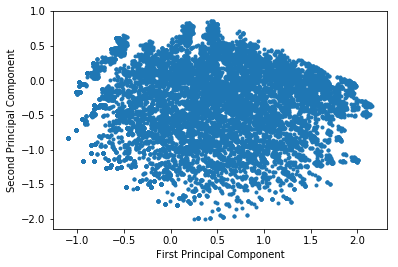

In [37]:
cov_matrix = np.array(data1[x_features1].cov())
val, vec = la.eig(cov_matrix)
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]
vec1 = vec[:,0]
vec2 = -vec[:,1]
new_c = []
labels = []
for index, rows in data1.iterrows():
    fila = rows[x_features1].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])
new_c=np.array(new_c)
plt.plot(new_c[:,0],new_c[:,1],'.',)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Again, a previous scanning was made for all clusters from 2 to 100, but was found that the optimal number was 89, so here just are shown from 88 to 91 to make the processing time shorter.

In [38]:
range_n_clusters = np.arange(88,91)
X = data1[x_features1]
score = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 88 The average silhouette_score is : 0.07737280017922288
For n_clusters = 89 The average silhouette_score is : 0.07873610219454878
For n_clusters = 90 The average silhouette_score is : 0.0765845533939185


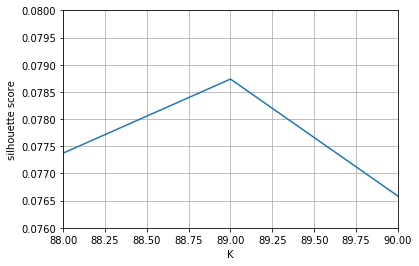

In [40]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.xlim(88,90)
plt.ylim(0.076,0.08)
plt.grid()

In [66]:
cluster89 = KMeans(n_clusters=89, random_state=10)
cluster_labels = cluster89.fit_predict(data1[x_features1])
data1['clusters'] = cluster_labels

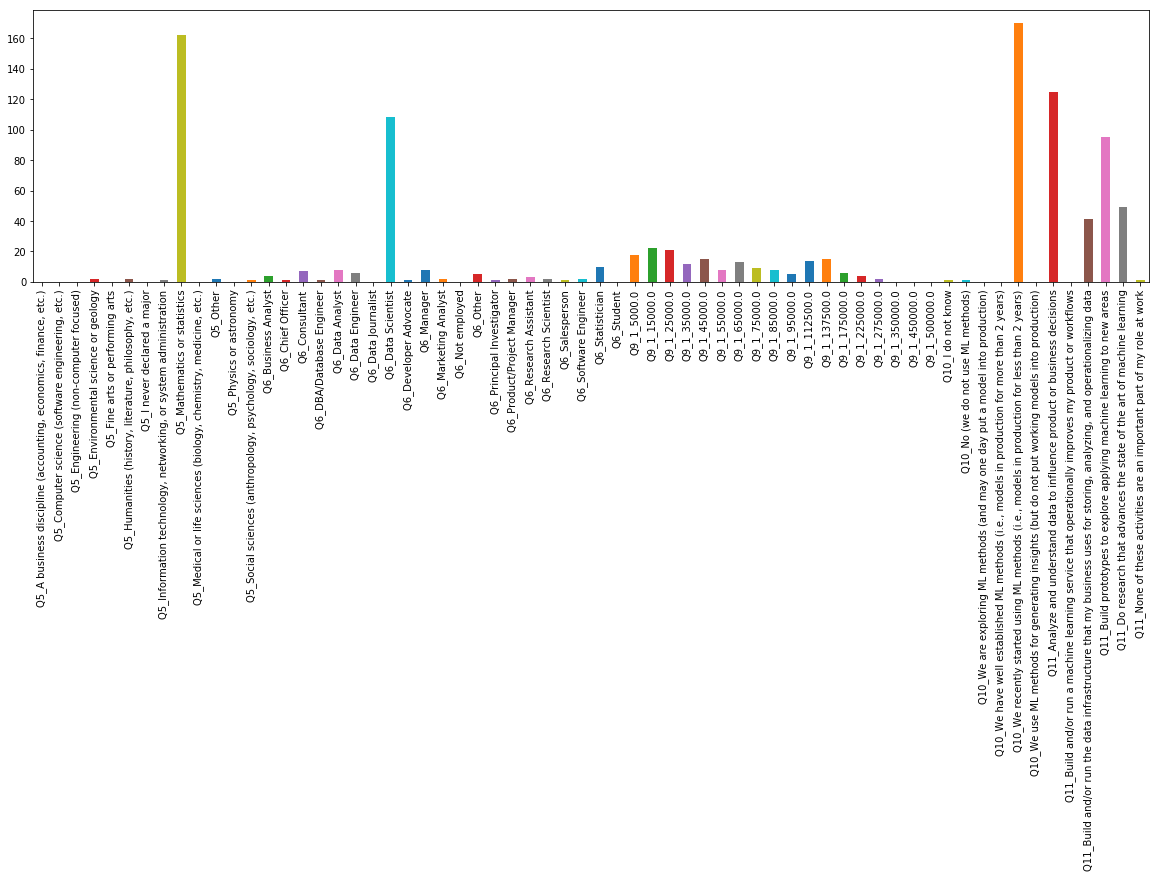

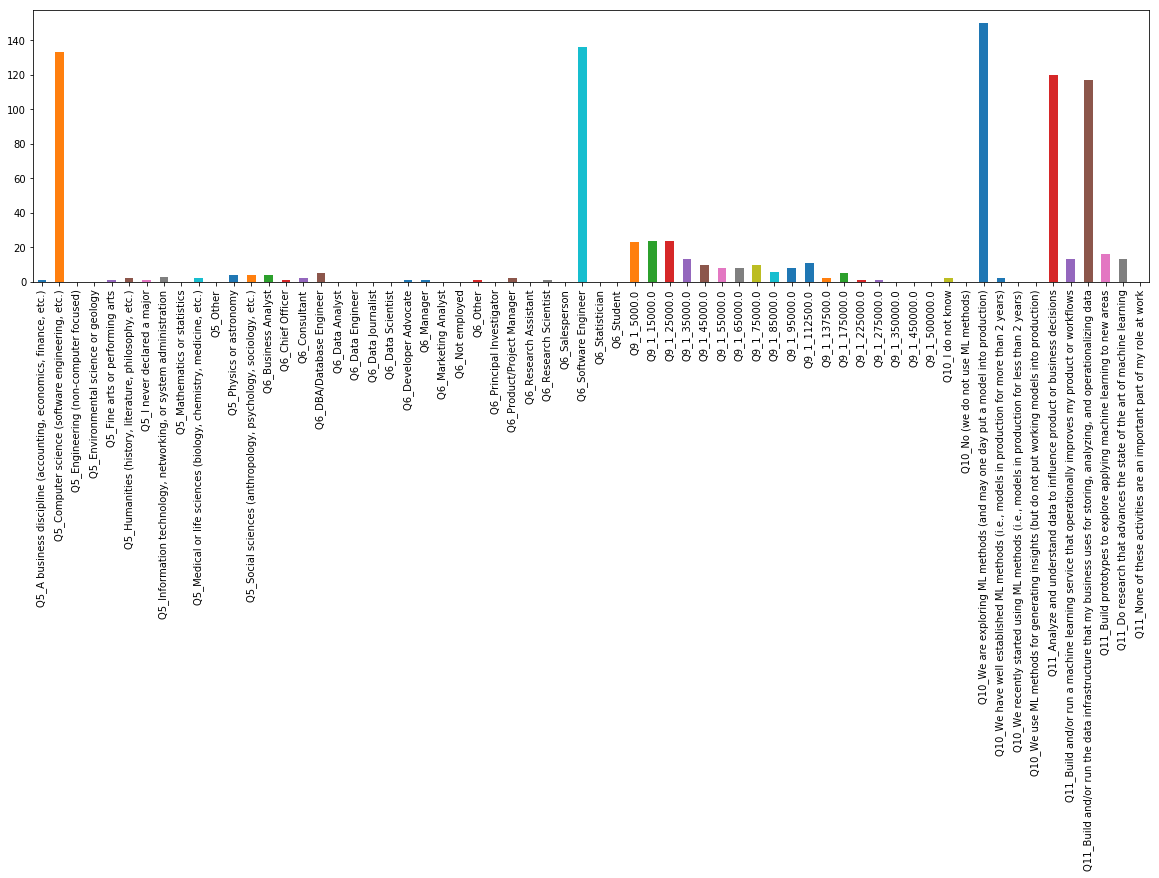

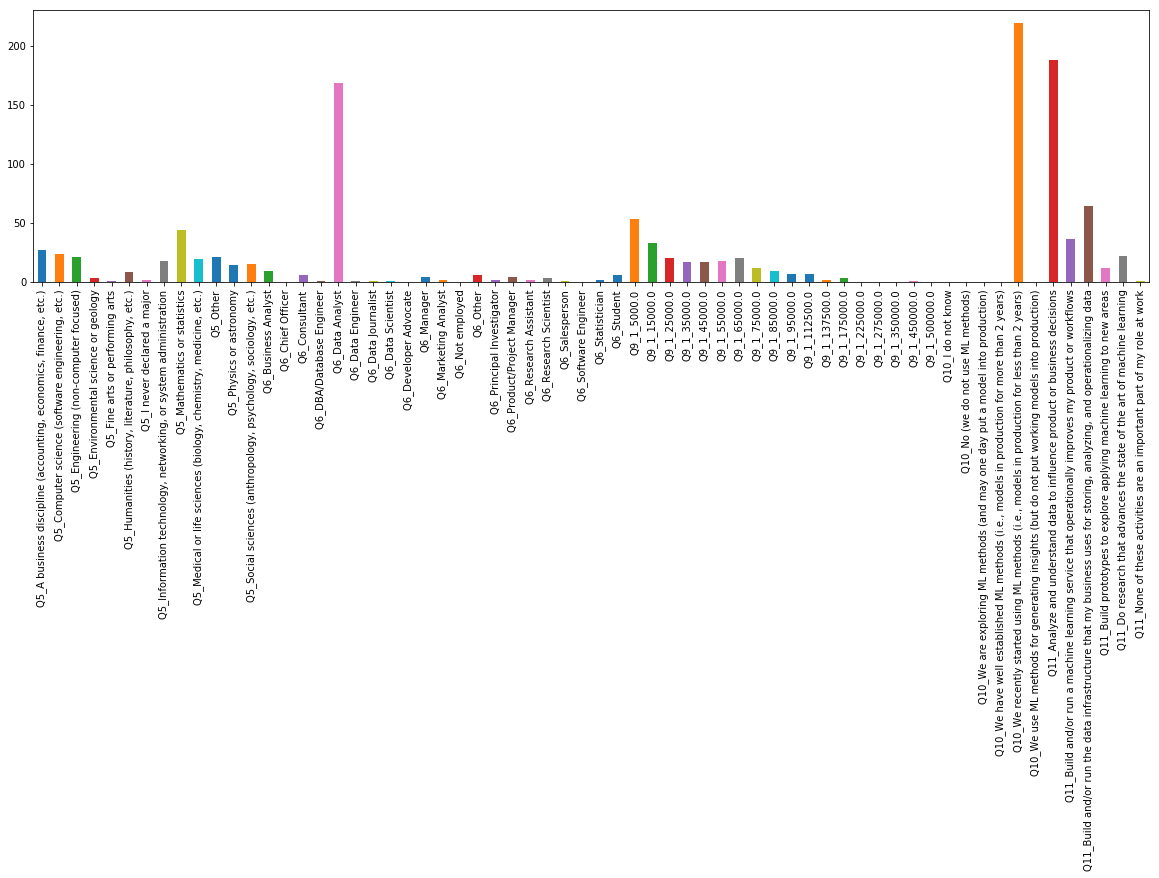

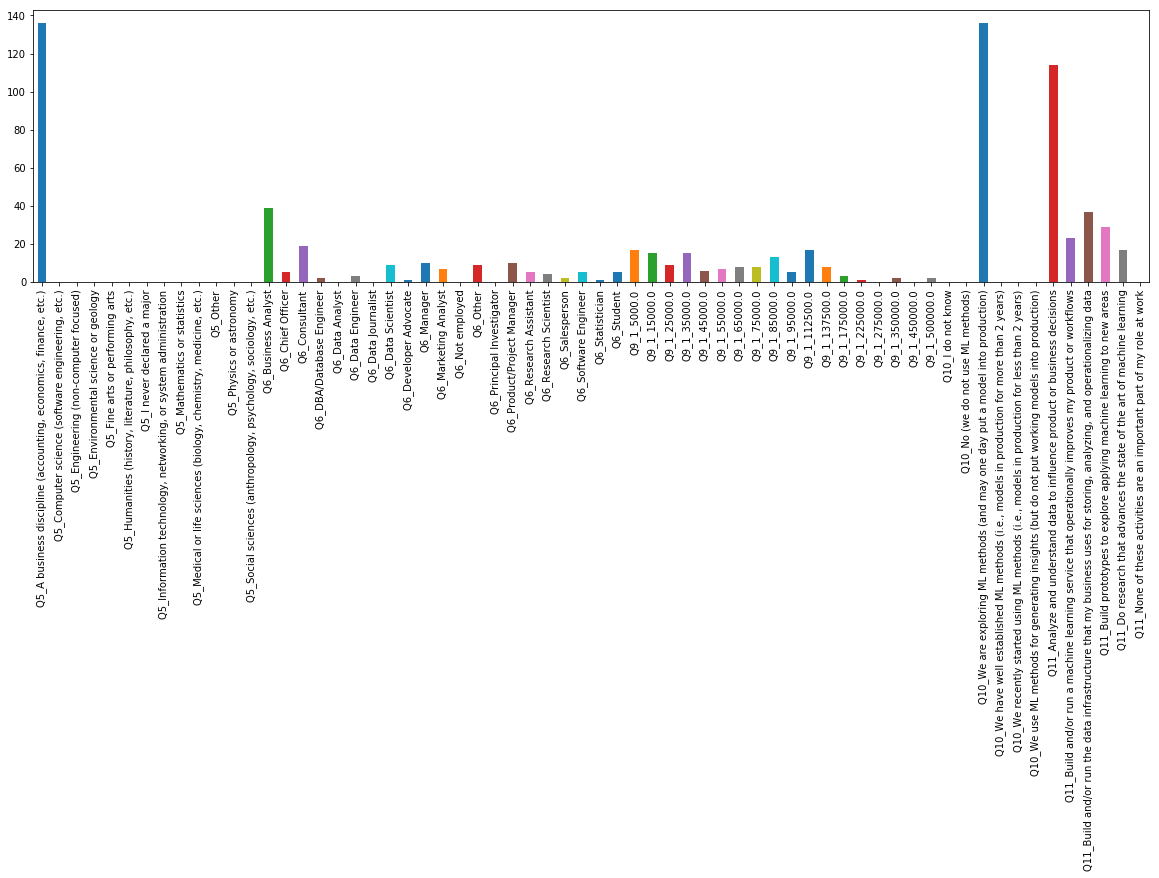

In [67]:
data1[data1.clusters==20].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data1[data1.clusters==33].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data1[data1.clusters==67].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data1[data1.clusters==88].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))

Choosing three random clusters (12, 33, 67 and 88) can be deduced that most of interviewed software engineers and some people who work in bussines disciplines, math, are using different machine learning methods at work. 

## Subcategory 2: Time Coding

Text(0, 0.5, 'Second Principal Component')

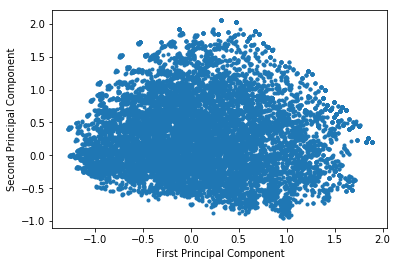

In [471]:
cov_matrix = np.array(data2[x_features2].cov())
val, vec = la.eig(cov_matrix)
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]
vec1 = vec[:,0]
vec2 = -vec[:,1]
new_c = []
labels = []
for index, rows in data2.iterrows():
    fila = rows[x_features2].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])
new_c=np.array(new_c)
plt.plot(new_c[:,0],new_c[:,1],'.',)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [45]:
range_n_clusters = np.arange(72,78)
X = data2[x_features2]
score = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 72 The average silhouette_score is : 0.0557999068844274
For n_clusters = 73 The average silhouette_score is : 0.05184580680858004
For n_clusters = 74 The average silhouette_score is : 0.056026420719888594
For n_clusters = 75 The average silhouette_score is : 0.06070382677225634
For n_clusters = 76 The average silhouette_score is : 0.055560073195675526
For n_clusters = 77 The average silhouette_score is : 0.05883038815996221


(0.05, 0.065)

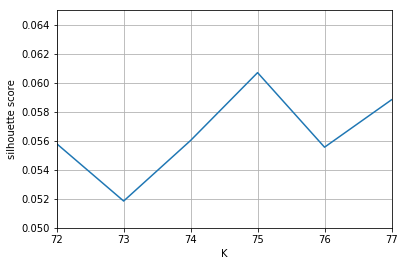

In [46]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.grid()
plt.xlim(72,77)
plt.ylim(0.05,0.065)

In [68]:
cluster75 = KMeans(n_clusters=75, random_state=10)
cluster_labels = cluster75.fit_predict(data2[x_features2])
data2['clusters'] = cluster_labels

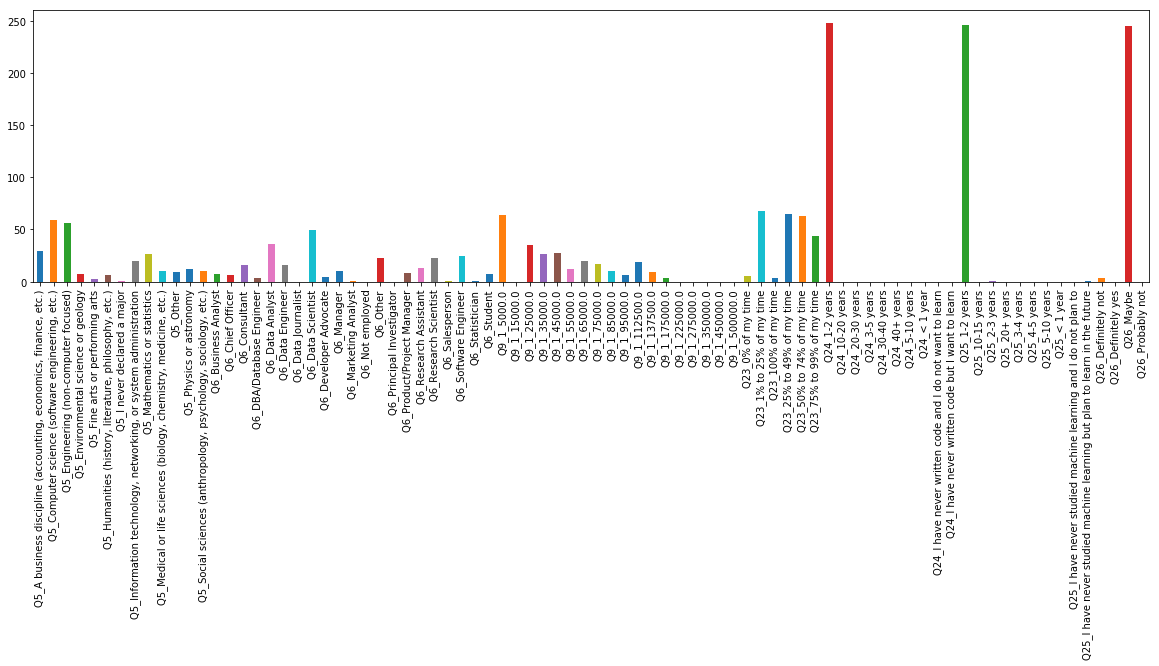

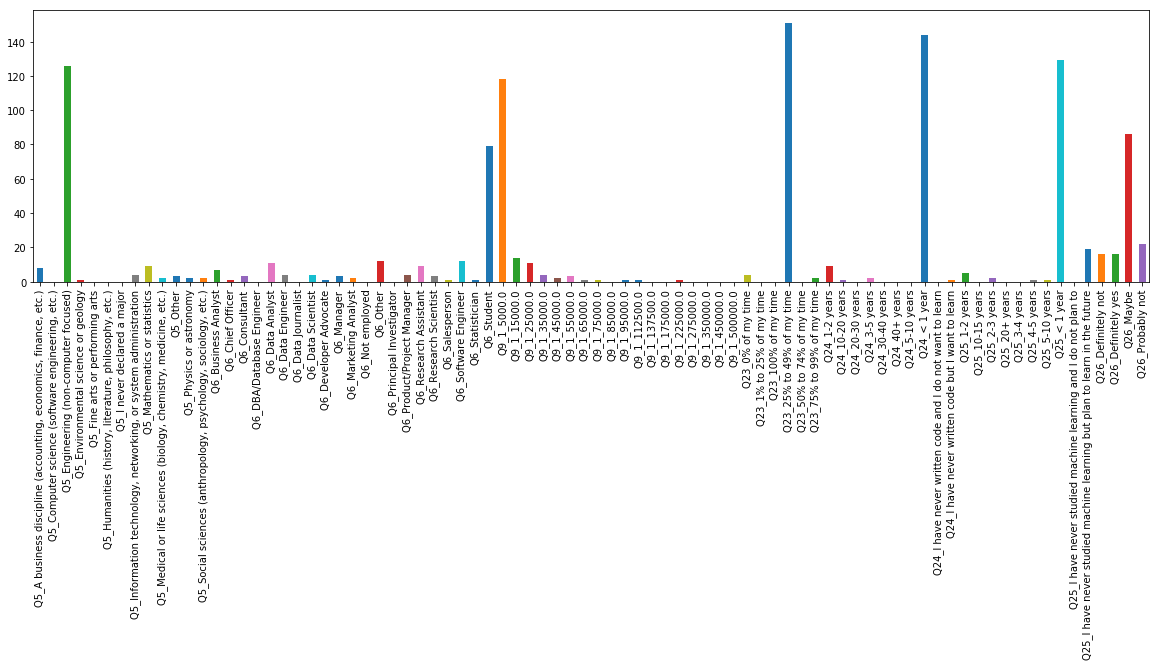

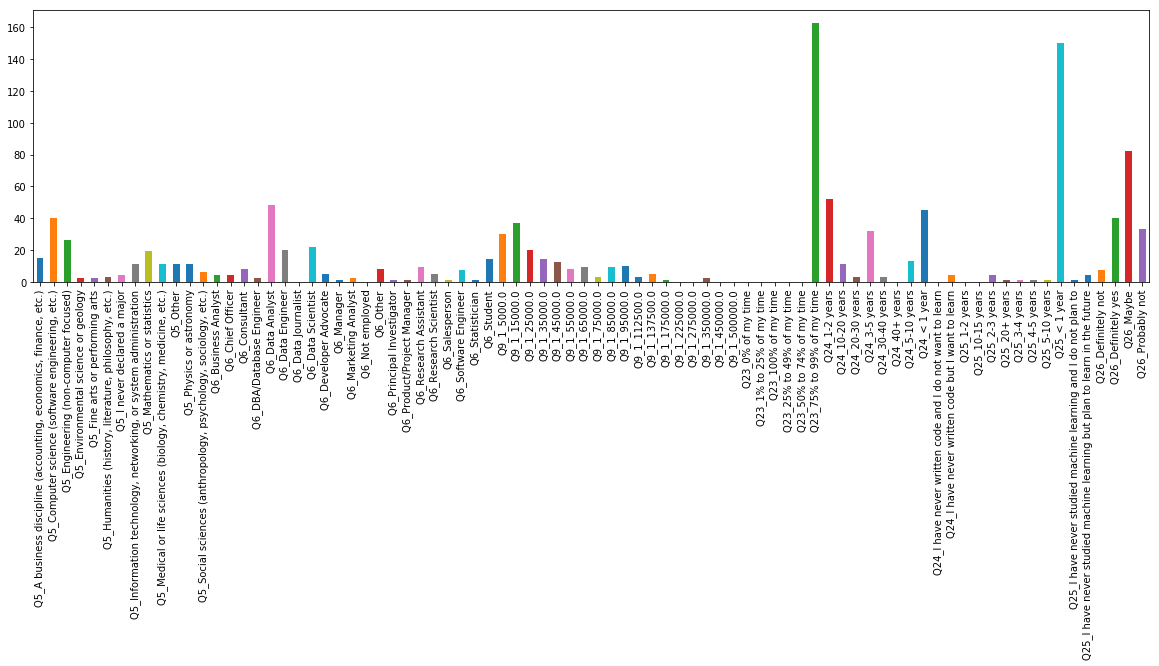

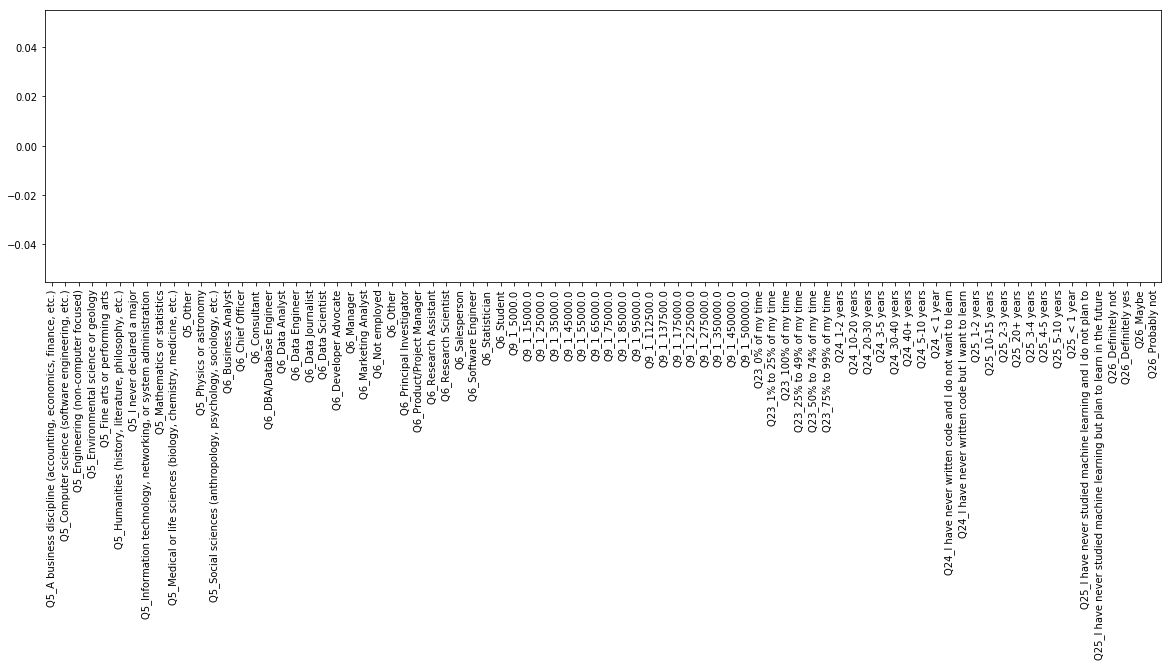

In [69]:
data2[data2.clusters==20].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data2[data2.clusters==33].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data2[data2.clusters==67].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data2[data2.clusters==88].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))

Most of those who have majors in math, physics, software engineering and a few in information technology or have the role as data analyst, data scientist, data engineer or data base engineer, spent at least a fourth of their time coding. Of these, most of those who have used machine learning more than 2 years and consider themselves as data scientists, and those who have used machine learning less than 2 years maybe consider themselves a data scientists.

## Subcategory 3: Data Science Courses

Text(0, 0.5, 'Second Principal Component')

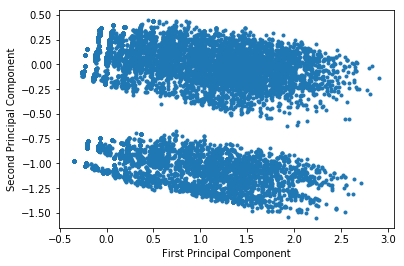

In [50]:
cov_matrix = np.array(data3[x_features3].cov())
val, vec = la.eig(cov_matrix)
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]
vec1 = vec[:,0]
vec2 = -vec[:,1]
new_c = []
labels = []
for index, rows in data3.iterrows():
    fila = rows[x_features3].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])
new_c=np.array(new_c)
plt.plot(new_c[:,0],new_c[:,1],'.',)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [51]:
range_n_clusters = np.arange(95,100)
X = data3[x_features3]
score = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)  

For n_clusters = 95 The average silhouette_score is : 0.24009944428303162
For n_clusters = 96 The average silhouette_score is : 0.22812039206743936
For n_clusters = 97 The average silhouette_score is : 0.23563382117296794
For n_clusters = 98 The average silhouette_score is : 0.24269947764192426
For n_clusters = 99 The average silhouette_score is : 0.23266850863944605


(96, 99)

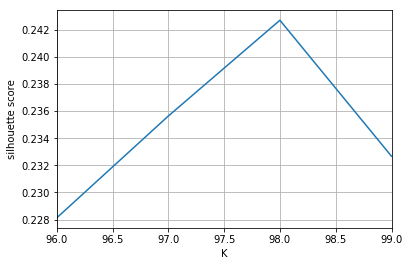

In [55]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.grid()
plt.xlim(96,99)

In [70]:
cluster98 = KMeans(n_clusters=98, random_state=10)
cluster_labels = cluster98.fit_predict(data3[x_features3])
data3['clusters'] = cluster_labels

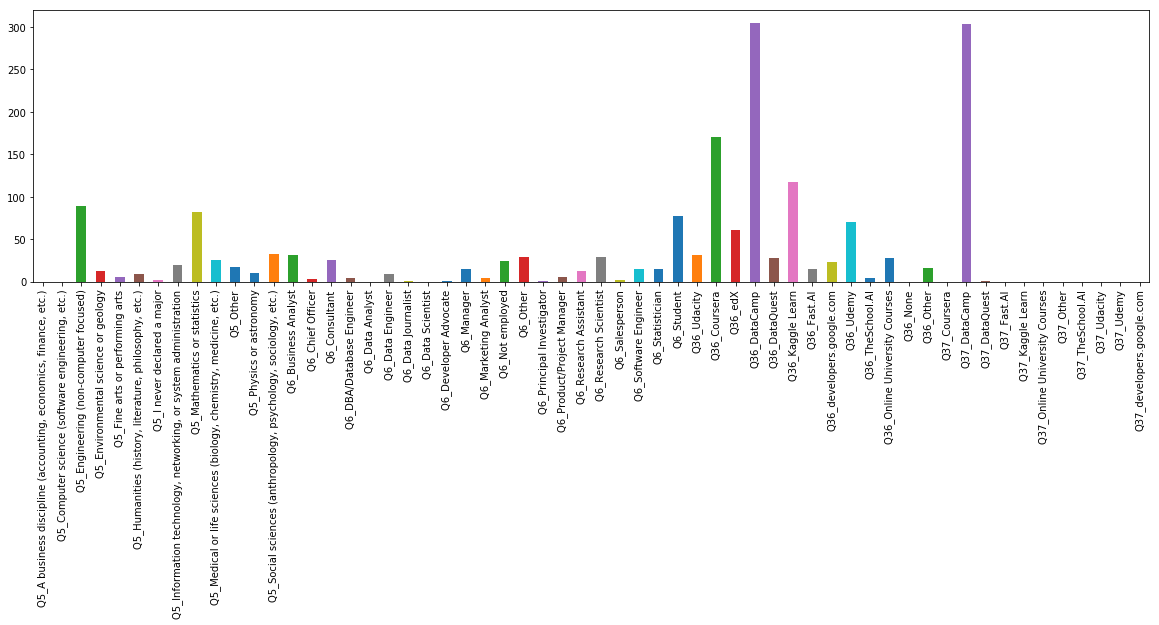

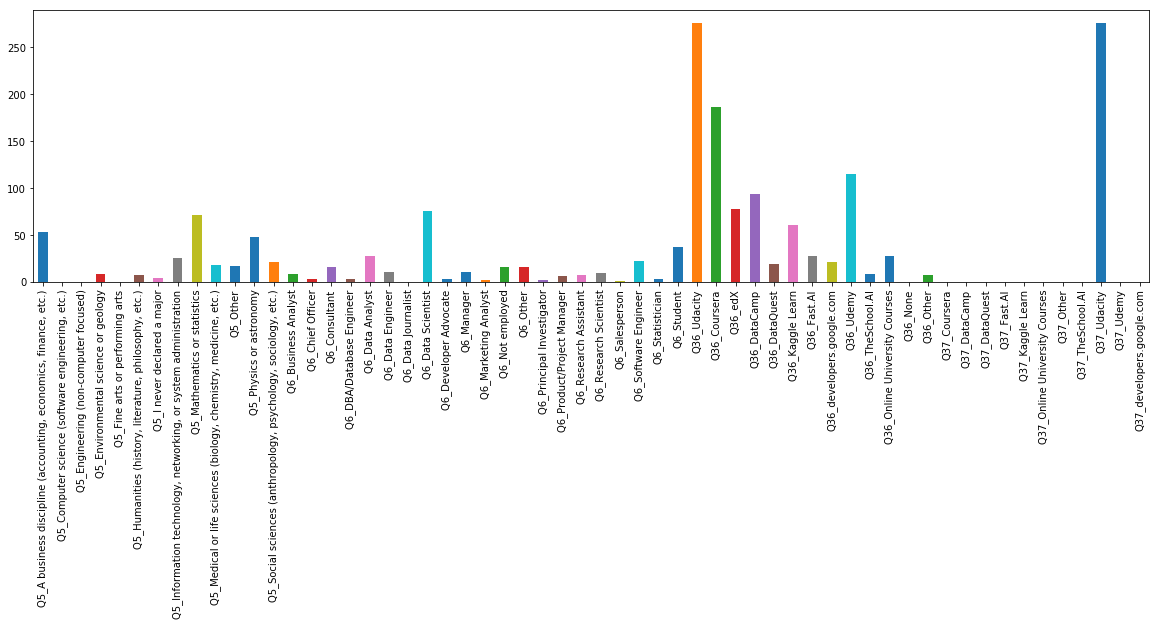

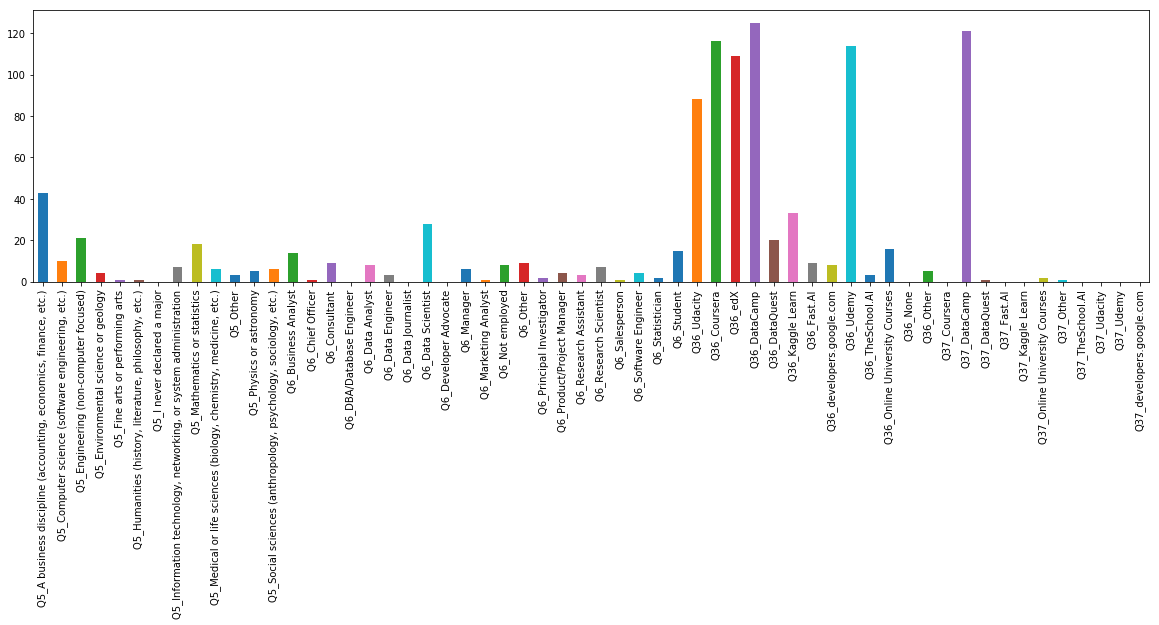

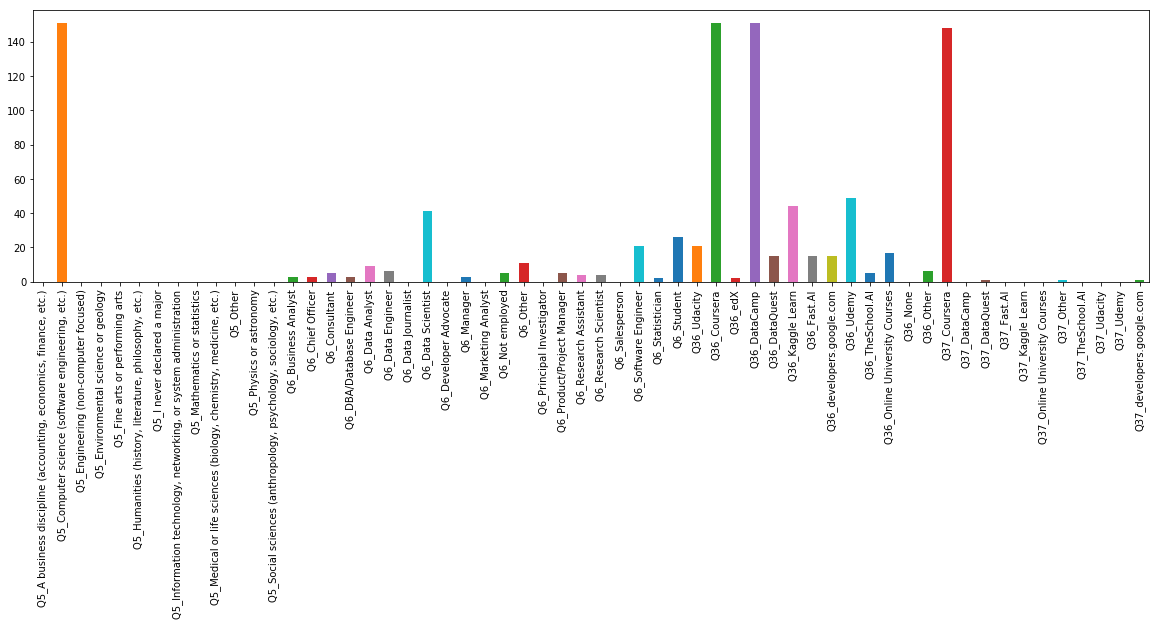

In [71]:
data3[data3.clusters==20].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data3[data3.clusters==33].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data3[data3.clusters==67].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data3[data3.clusters==88].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))

For the 98 clusters: Those who have majors like math, physics, bussines and engineering(non-computer focused) and have roles as data analyst, data scientist, data engineer or data base engineer have taken online courses. Software engineers tend to not take online courses.

## Subcategory 4: Bias

Text(0, 0.5, 'Second Principal Component')

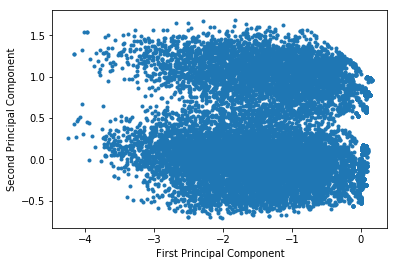

In [79]:
cov_matrix = np.array(data4[x_features4].cov())
val, vec = la.eig(cov_matrix)
vec = vec[:,val.argsort()[::-1]]
val = val[val.argsort()[::-1]]
vec1 = vec[:,0]
vec2 = -vec[:,1]
new_c = []
labels = []
for index, rows in data4.iterrows():
    fila = rows[x_features4].values
    new_c.append([proy(vec1,fila),proy(vec2,fila)])
new_c=np.array(new_c)
plt.plot(new_c[:,0],new_c[:,1],'.',)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [83]:
range_n_clusters = np.arange(96,105)
X = data4[x_features4]
score = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 96 The average silhouette_score is : 0.1911487120520193
For n_clusters = 97 The average silhouette_score is : 0.19350336351299818
For n_clusters = 98 The average silhouette_score is : 0.20351222066868568
For n_clusters = 99 The average silhouette_score is : 0.19889950107285126
For n_clusters = 100 The average silhouette_score is : 0.19275499438611804
For n_clusters = 101 The average silhouette_score is : 0.19653694810901093
For n_clusters = 102 The average silhouette_score is : 0.20772458235525873
For n_clusters = 103 The average silhouette_score is : 0.20184248352735495
For n_clusters = 104 The average silhouette_score is : 0.20628784174528197


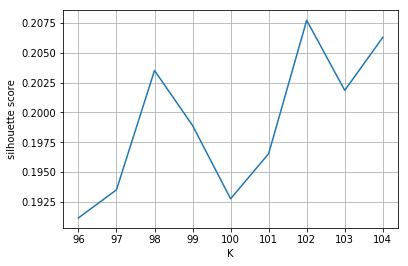

In [85]:
plt.plot(range_n_clusters,score)
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.grid()

In [86]:
cluster102 = KMeans(n_clusters=102, random_state=10)
cluster_labels = cluster102.fit_predict(data4[x_features4])
data4['clusters'] = cluster_labels

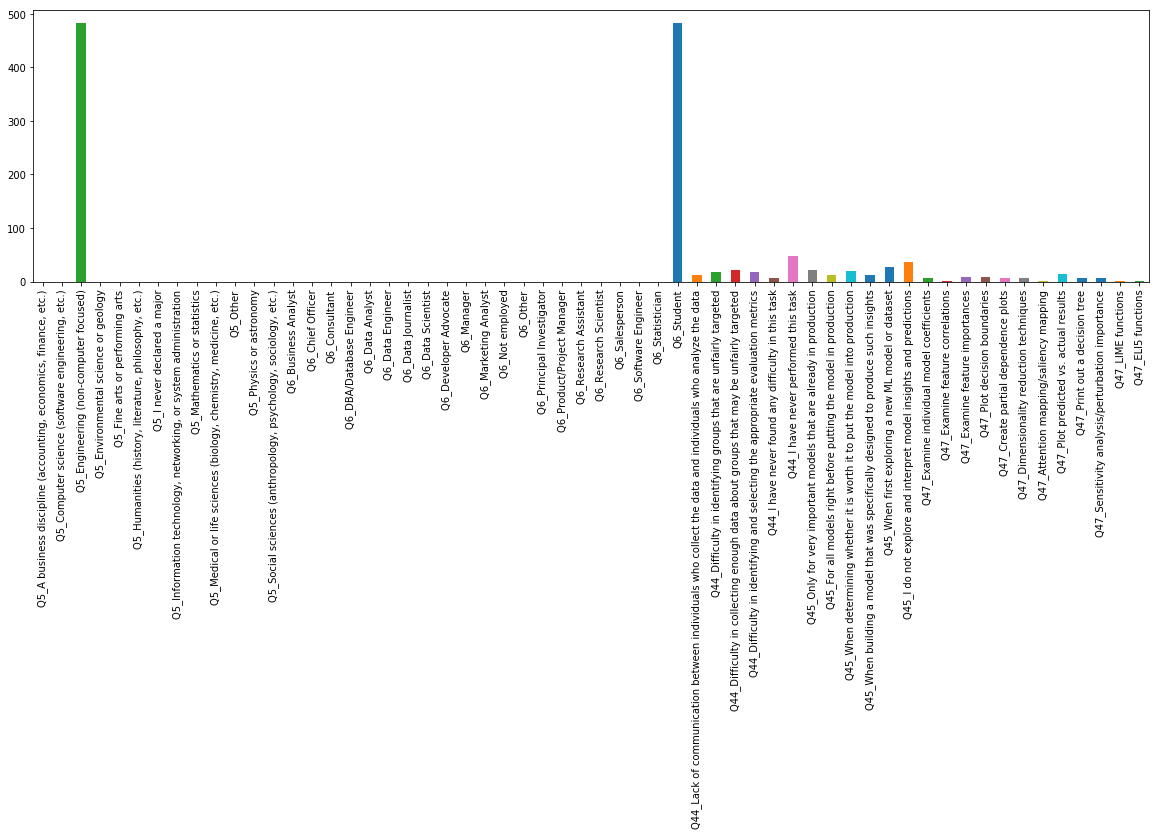

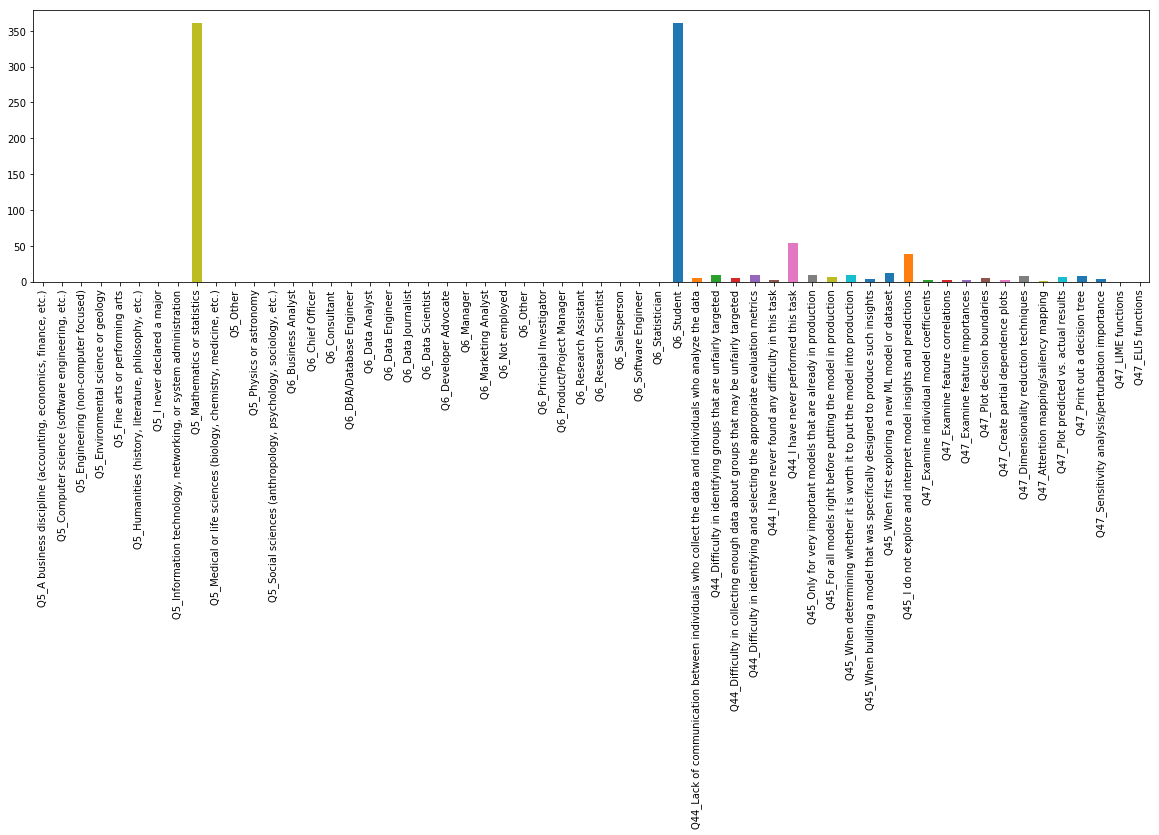

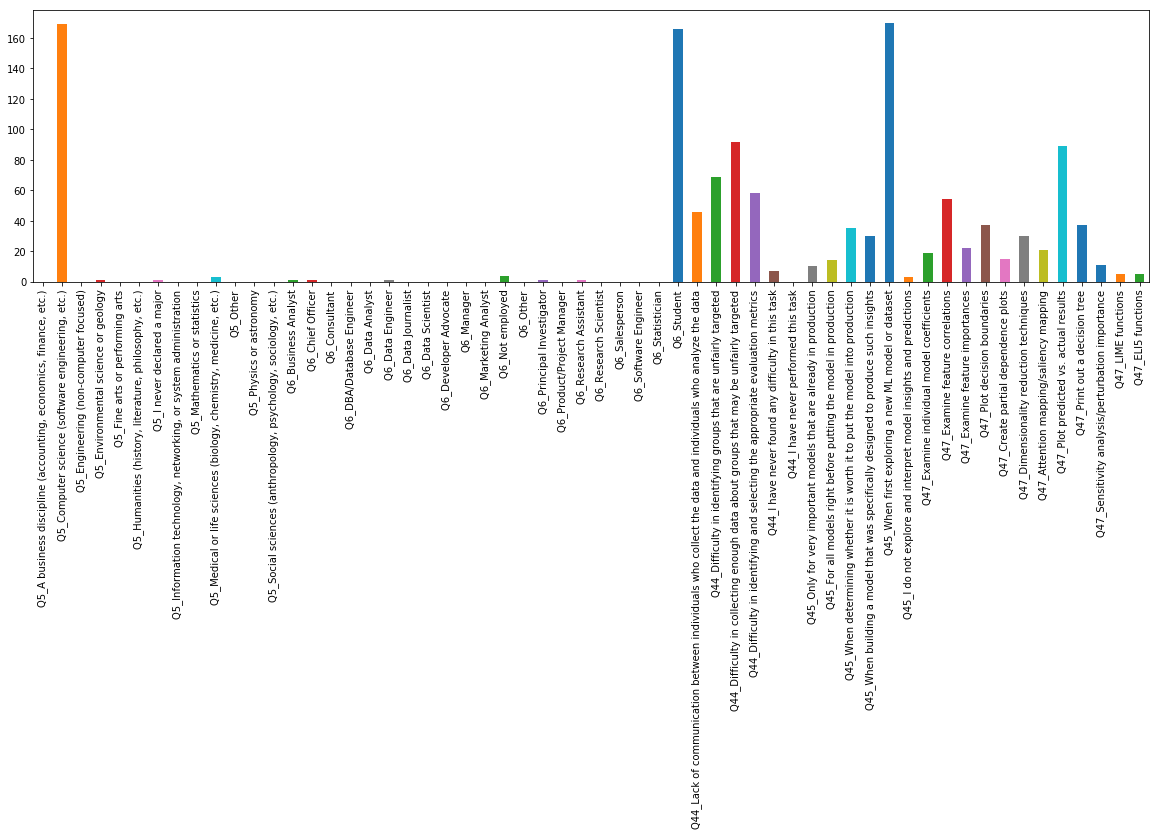

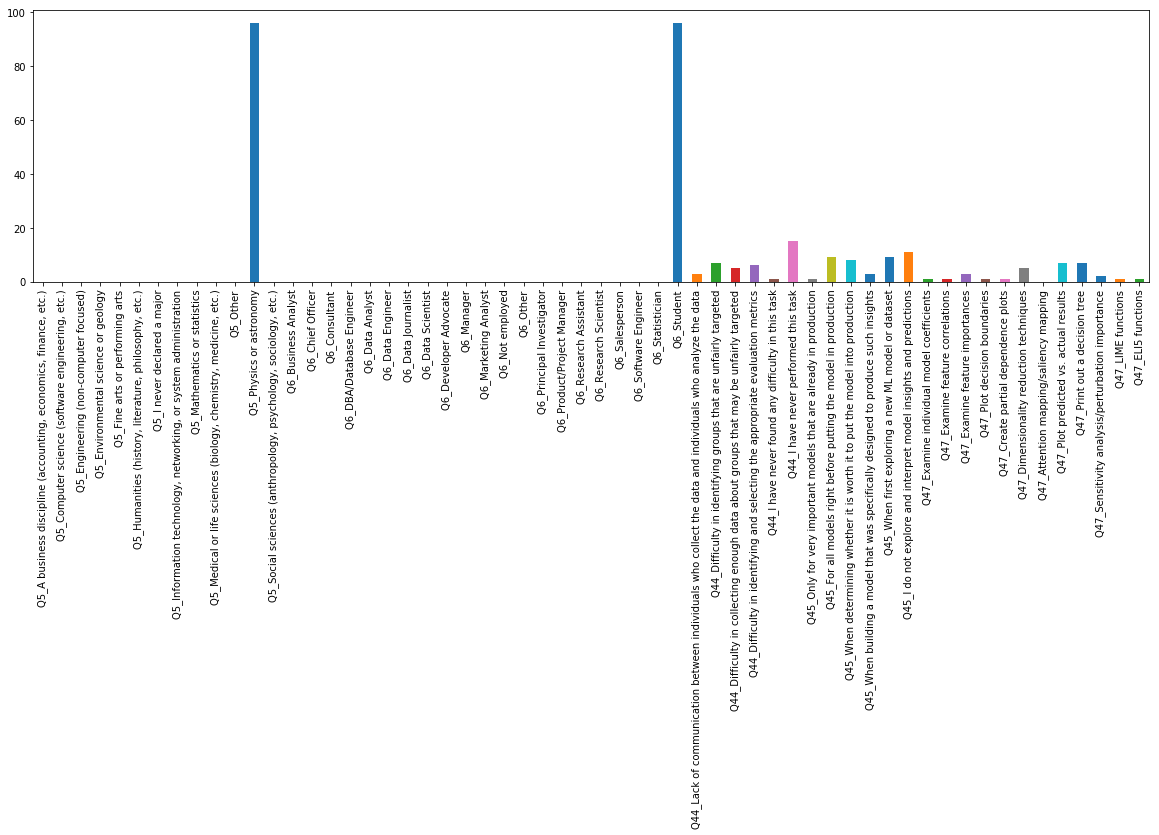

In [87]:
data4[data4.clusters==20].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data4[data4.clusters==33].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data4[data4.clusters==67].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data4[data4.clusters==88].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))

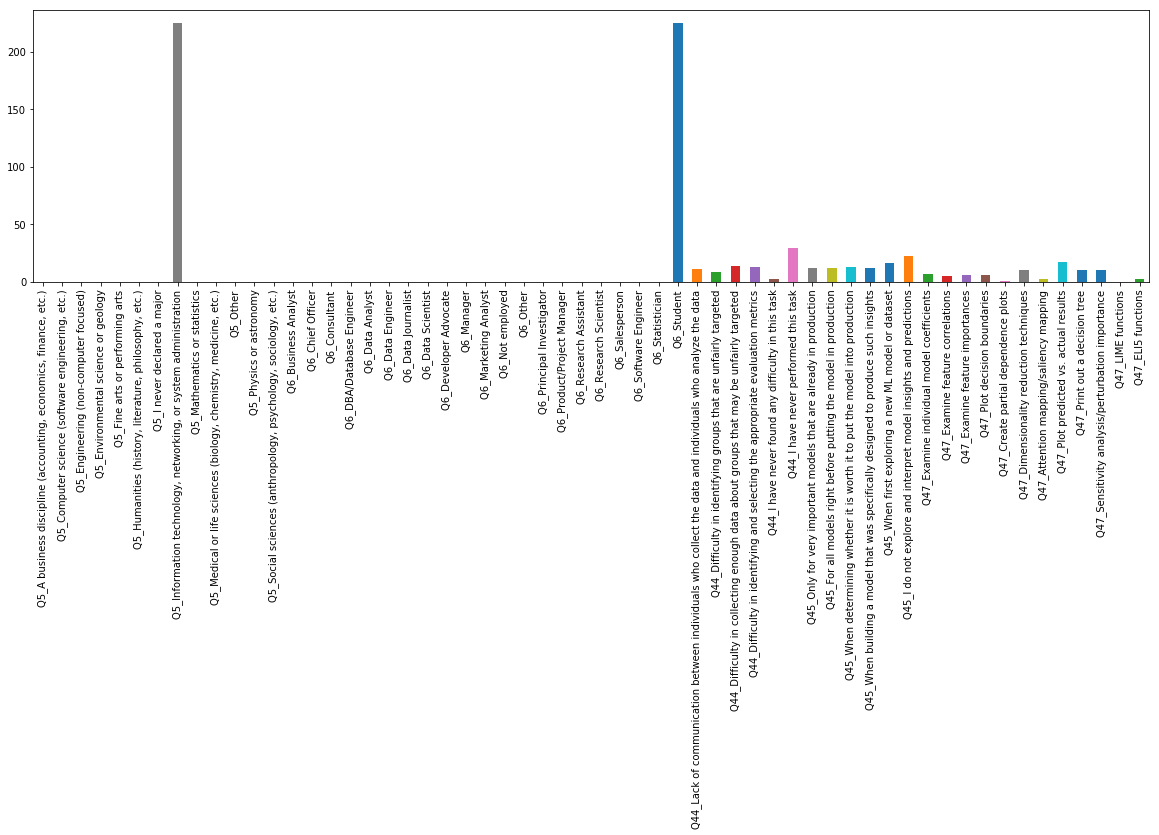

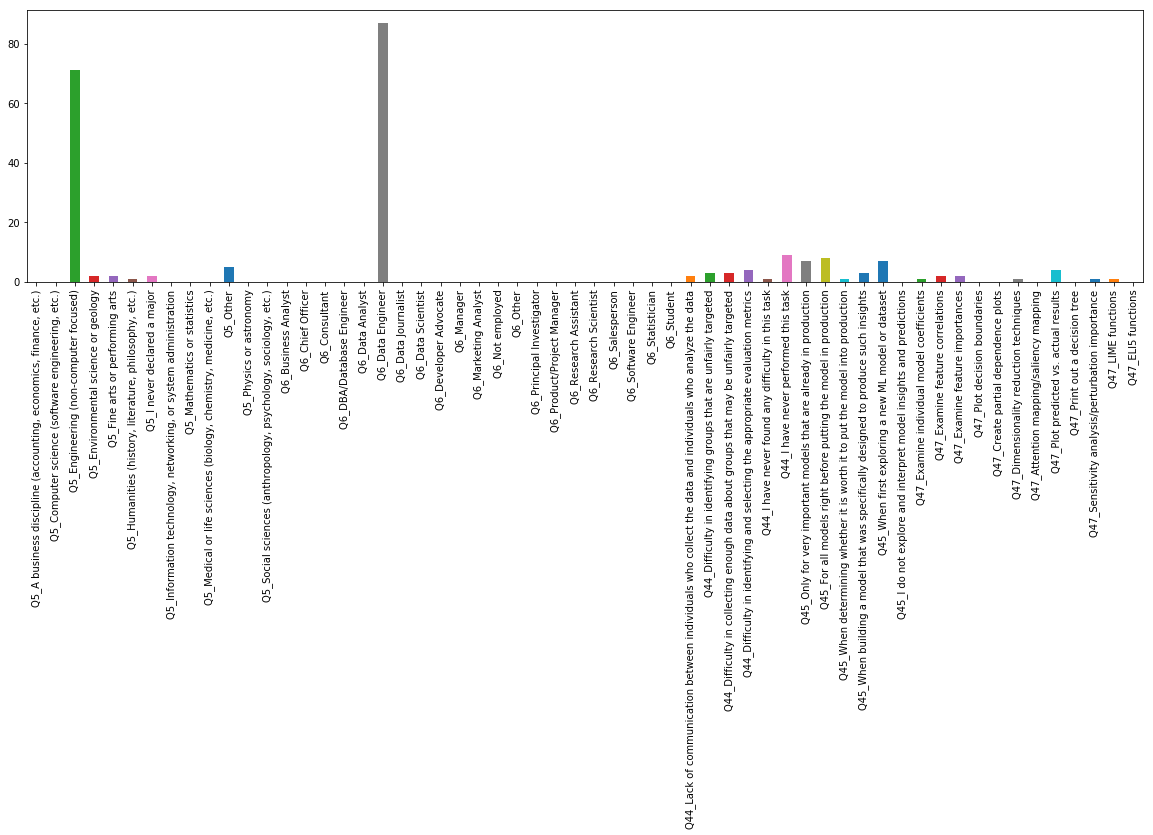

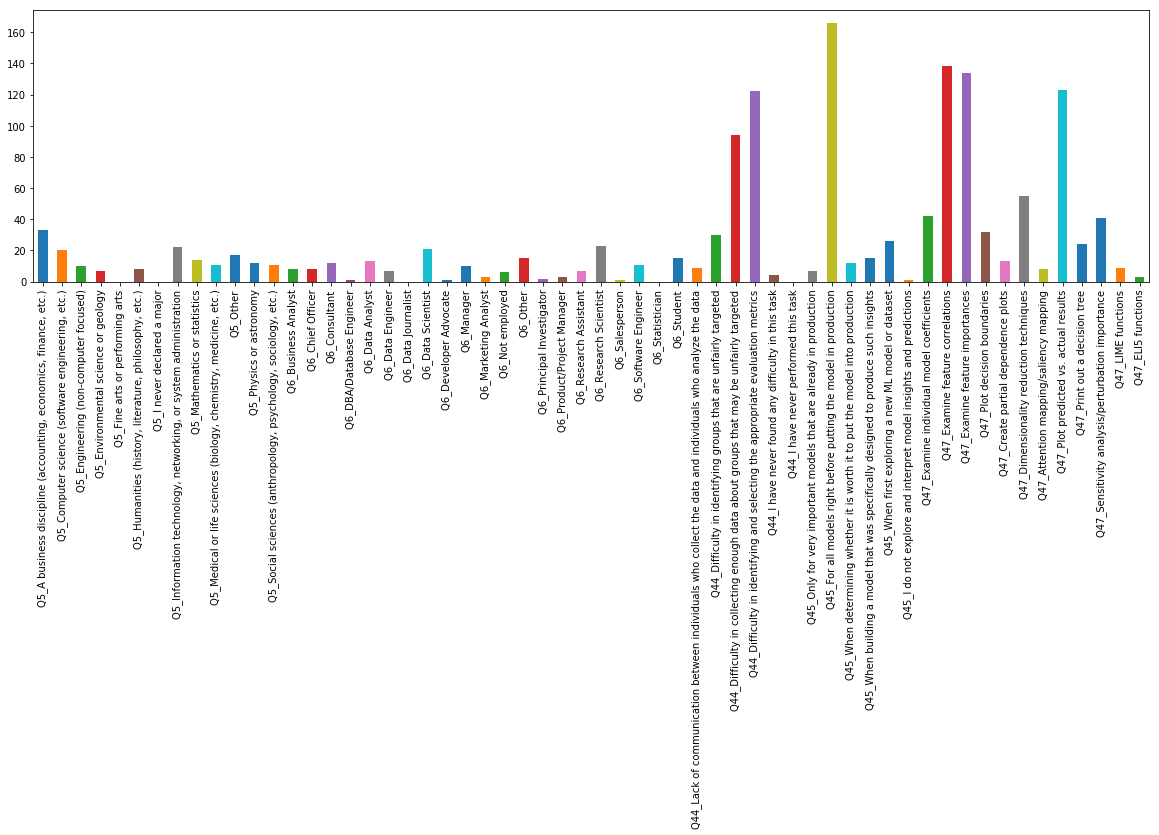

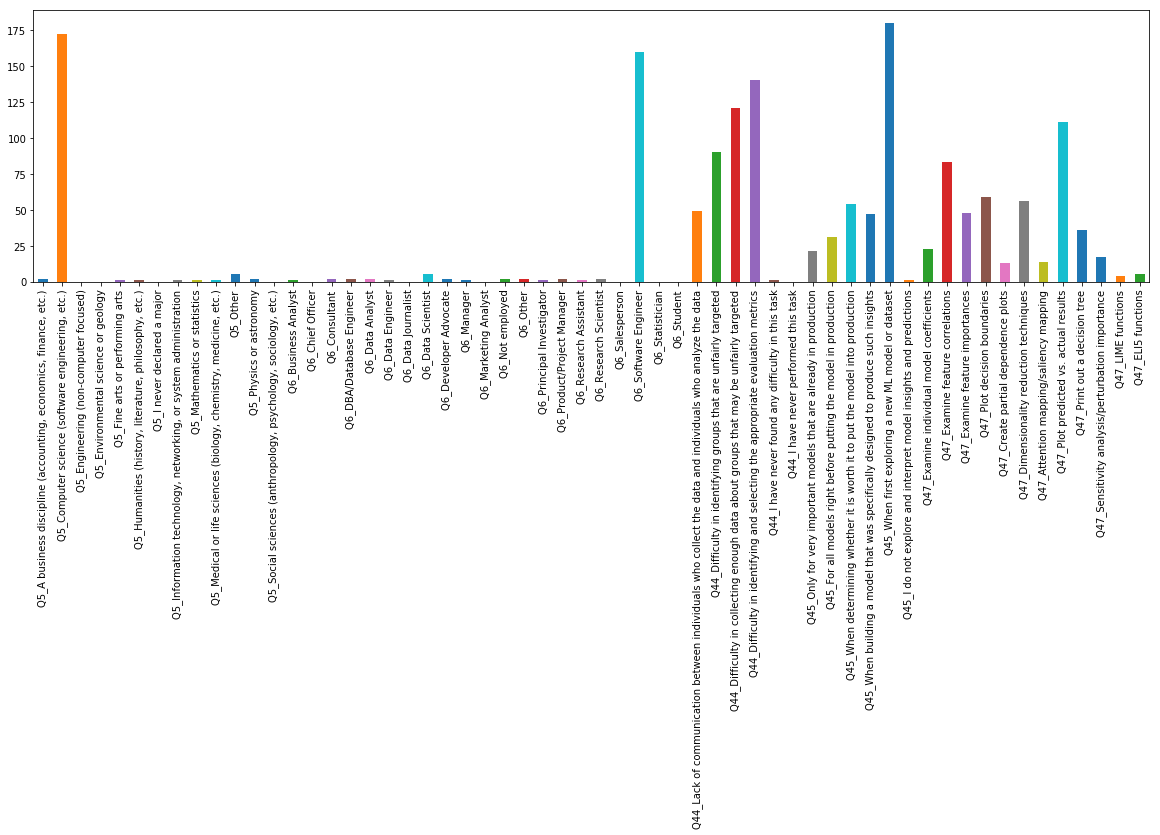

In [88]:
data4[data4.clusters==25].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data4[data4.clusters==47].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data4[data4.clusters==72].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))
data4[data4.clusters==83].sum()[0:-2].plot.bar(fig = plt.figure(figsize = (20,5)))

Most of the interviewed that have in mind that bias is an issue are students with majors in math, physics, engineering and information techonoly